In [1]:
import nltk
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [3]:
data = pd.read_csv("jigsaw-toxic-comment-train.csv")

In [4]:
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
data_clean = data[:][["comment_text","toxic"]]

In [6]:
data_clean.head()

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [7]:
print(data_clean[0:1]["comment_text"])

0    Explanation\nWhy the edits made under my usern...
Name: comment_text, dtype: object


In [8]:
sentiment = []
i = 0
for i in data_clean["toxic"]:
    if i==0:
        sentiment.append("pos")
    elif i==1:
        sentiment.append("neg")

In [9]:
data_clean["sentiment"] = sentiment

In [10]:
data_clean.head(1)

,comment_text,toxic,sentiment
0,Explanation\nWhy the edits made under my usern...,0,pos


In [11]:
documents = []
i = 0
for category in data_clean["sentiment"].unique():
    documents.append(    (    list(data_clean[i:i+1]["comment_text"])  ,category)    )
    i=i+1

In [12]:
documents[0:5]

[(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"],
  'pos'),
 (["D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"],
  'neg')]

In [13]:
import seaborn as sns

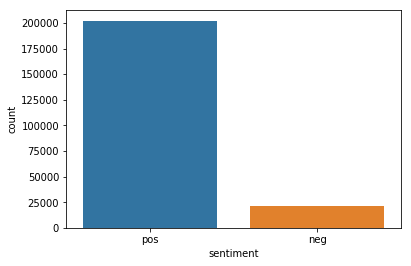

In [14]:
sns.countplot('sentiment', data = data_clean)

In [15]:
import re

In [16]:
TAG_RE = re.compile(r'<[^>]+>')

In [17]:

def remove_tags(text):
    return TAG_RE.sub('', text)


In [18]:
def preprocess_text(sen):
    
    sentence = sen.lower()
    
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [19]:
X = []
sentences = list(data_clean["comment_text"])
for sen in sentences:
    X.append(preprocess_text(sen))

In [20]:
y = data_clean["toxic"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
"""
for sen,labels in documents:
    preprocess_text(sen)
    documents_new.append(sen, labels)
"""

'\nfor sen,labels in documents:\n    preprocess_text(sen)\n    documents_new.append(sen, labels)\n'

In [24]:
X_test[0:5]

[' You might like to consider that don give shit what you do or think ',
 'What the heck are you talking about ask my good chum because your question is unclear And if it unclear how can it possibly be answered ',
 'Uncle Tom House Niggers',
 'Well just because you hate the word doesn mean mentioning it in WP is vandalism ',
 'source Places named Scotland']

In [25]:
documents_new = []
i=0
sentences = list(data_clean["comment_text"])
for sen in sentences:
    documents_new.append(    (    set(preprocess_text(sen)), data_clean.loc[i,"toxic"]    )    )
    i = i+1

In [28]:
documents_new[0:10]

[({' ',
   'A',
   'C',
   'D',
   'E',
   'F',
   'G',
   'H',
   'M',
   'N',
   'T',
   'W',
   'Y',
   'a',
   'c',
   'd',
   'e',
   'f',
   'g',
   'h',
   'i',
   'j',
   'k',
   'l',
   'm',
   'n',
   'o',
   'p',
   'r',
   's',
   't',
   'u',
   'v',
   'w',
   'x',
   'y'},
  0),
 ({' ',
   'C',
   'D',
   'H',
   'J',
   'T',
   'U',
   'a',
   'b',
   'c',
   'd',
   'e',
   'g',
   'h',
   'i',
   'k',
   'l',
   'm',
   'n',
   'o',
   'r',
   's',
   't',
   'u',
   'w',
   'y'},
  0),
 ({' ',
   'H',
   'I',
   'a',
   'b',
   'c',
   'd',
   'e',
   'f',
   'g',
   'h',
   'i',
   'j',
   'k',
   'l',
   'm',
   'n',
   'o',
   'p',
   'r',
   's',
   't',
   'u',
   'v',
   'w',
   'y'},
  0),
 ({' ',
   'G',
   'I',
   'M',
   'T',
   'W',
   'a',
   'b',
   'c',
   'd',
   'e',
   'f',
   'g',
   'h',
   'i',
   'k',
   'l',
   'm',
   'n',
   'o',
   'p',
   'r',
   's',
   't',
   'u',
   'v',
   'w',
   'x',
   'y'},
  0),
 ({' ',
   'A',
   'Y',
   'a',
   '

In [29]:
from keras.preprocessing.text import Tokenizer

In [30]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [31]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [32]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [33]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Artificial Neural Net

In [100]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [101]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          19494600  
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 19,504,601
Trainable params: 10,001
Non-trainable params: 19,494,600
_________________________________________________________________
None


In [102]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 143071 samples, validate on 35768 samples
Epoch 1/6
143071/143071 [==============================] - 6s 41us/step - loss: 0.2194 - acc: 0.9235 - val_loss: 0.1922 - val_acc: 0.9324
Epoch 2/6
143071/143071 [==============================] - 4s 30us/step - loss: 0.1844 - acc: 0.9338 - val_loss: 0.1898 - val_acc: 0.9339
Epoch 3/6
143071/143071 [==============================] - 4s 30us/step - loss: 0.1753 - acc: 0.9366 - val_loss: 0.1901 - val_acc: 0.9334
Epoch 4/6
143071/143071 [==============================] - 4s 31us/step - loss: 0.1685 - acc: 0.9387 - val_loss: 0.1935 - val_acc: 0.9323
Epoch 5/6
143071/143071 [==============================] - 5s 32us/step - loss: 0.1642 - acc: 0.9400 - val_loss: 0.1960 - val_acc: 0.9349
Epoch 6/6
143071/143071 [==============================] - 4s 31us/step - loss: 0.1607 - acc: 0.9409 - val_loss: 0.1948 - val_acc: 0.9328


In [103]:
score = model.evaluate(X_test, y_test, verbose=1)
print("train_accuracy: ",score[0])
print("test_accuracy: ",score[1])

44710/44710 [==============================] - 1s 28us/step
train_accuracy:  0.2018808632775778
test_accuracy:  0.9309774041175842


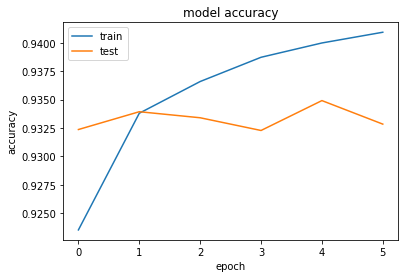

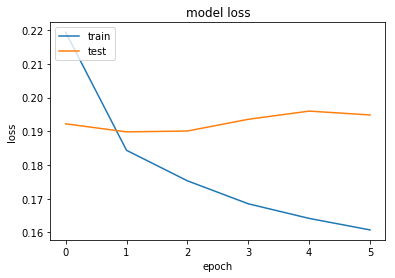

In [114]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [116]:
import os
os.makedirs('./outputs')

In [117]:
import pickle
import sys
import os
print('Exporting the model to tokic_ann.pkl')
file = open('./outputs/tokic_ann.pkl','wb')
pickle.dump(model, file)
file.close()

Exporting the model to tokic_ann.pkl


In [2]:
import pandas as pd
test = pd.read_csv("test.csv")

In [3]:
test.head()

,id,content,lang
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,2,"Quindi tu sei uno di quelli conservativi , ...",it
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr


In [22]:
X_new = []
sentences = list(test["content"])
for sen in sentences:
    X_new.append(preprocess_text(sen))

In [40]:
X_new

['Doctor Who adl viki ba na doctor olarak bir viki yazar kendi ad eklemi tir ahsen zelttim Onaylarsan sevinirim Occipital ',
 ' ',
 'Quindi tu sei uno di quelli conservativi che preferiscono non cancellare Ok Avresti lasciato anche sfaccimma Si Ok Contento te io non approvo per nulla ma non conto nemmeno nulla Allora lo sai che faccio Me ne frego Aborro il fascismo ma quando ce vo ce vo Elborgo sms ',
 'Malesef ger ekle tirilmedi ancak yle bir ey vard Belki yararlan rs z yi al malar Kud yaz Te ekk ederim Abidenin maddesini de geni letmeyi n yorum ileride ime yarayacak bu cobija Kulland m bilmiyorum ama unu ve unu da ben ili tireyim Belki kaynak alar laz olur RapsarEfendim Yok mu art ran Kulland z bilmiyorum ama kullanmad ysan alttaki model senaryo ve yerle tirme ba klar da incelemenizi tavsiye ederim Kud yaz Aynen ya ok zel bir kaynak ama al ma sahiplerine att e postaya bir cevap gelmedi Oradaki al malar kullanabilseydim zel olacakt cobija ',
 ' Resim Seldabagcan jpg resminde kaynak so

In [12]:
import pickle
with open('outputs/tokic_ann.pkl','rb') as pickled_file:
    model_ann = pickle.load(pickled_file)
    pickled_file.close()

In [42]:
from keras.preprocessing.text import Tokenizer

In [43]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [44]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [45]:
X_new = tokenizer.texts_to_sequences(X_new)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 100
X_new = pad_sequences(X_new, padding='post', maxlen=maxlen)

In [83]:
y_test.shape

(44710,)

In [72]:
predictions = model.predict([X_test])

In [81]:
predictions[0]

array([0.33167154], dtype=float32)

In [82]:
predictions.shape

(44710, 1)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
accuracy = model.evaluate(X_train, y_train)
print('Accuracy : {}'.format(accuracy))

178839/178839 [==============================] - 8s 42us/step
Accuracy : [0.15745317252006144, 0.9432674050331116]


In [91]:
accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

44710/44710 [==============================] - 2s 41us/step
Accuracy: [0.2018808632775778, 0.9309774041175842]


# Convolutional Neural Net

In [99]:
from keras.layers import Conv1D

In [100]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [101]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          19494600  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 19,558,857
Trainable params: 64,257
Non-trainable params: 19,494,600
_________________________________________________________________
None


In [102]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 143071 samples, validate on 35768 samples
Epoch 1/6
143071/143071 [==============================] - 259s 2ms/step - loss: 0.1602 - acc: 0.9408 - val_loss: 0.1351 - val_acc: 0.9495
Epoch 2/6
143071/143071 [==============================] - 261s 2ms/step - loss: 0.1296 - acc: 0.9515 - val_loss: 0.1548 - val_acc: 0.9461
Epoch 3/6
143071/143071 [==============================] - 262s 2ms/step - loss: 0.1165 - acc: 0.9558 - val_loss: 0.1404 - val_acc: 0.9505
Epoch 4/6
143071/143071 [==============================] - 248s 2ms/step - loss: 0.1014 - acc: 0.9619 - val_loss: 0.1323 - val_acc: 0.9513
Epoch 5/6
143071/143071 [==============================] - 256s 2ms/step - loss: 0.0898 - acc: 0.9668 - val_loss: 0.1386 - val_acc: 0.9491
Epoch 6/6
44710/44710 [==============================] - 27s 594us/step


In [105]:
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Test score:  0.1453733257916024
Test accuracy:  0.9501453638076782


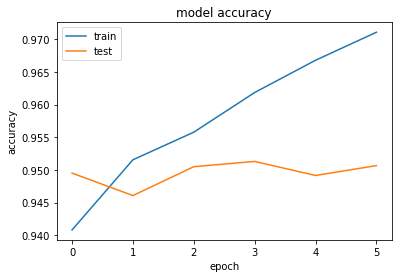

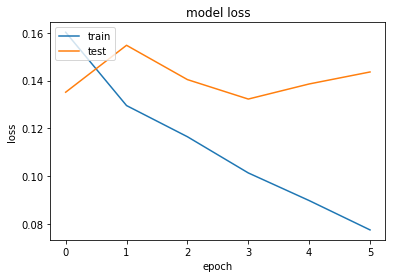

In [106]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [107]:
"""
print('Exporting the model to tokic_cnn.pkl')
file = open('./outputs/tokic_cnn.pkl','wb')
pickle.dump(model, file)
file.close()
"""

Exporting the model to tokic_cnn.pkl


In [133]:
# Evaluation on a single instance using toxic_cnn.pkl
import pickle
with open('outputs/tokic_cnn.pkl','rb') as pickled_file:
    model_cnn = pickle.load(pickled_file)
    pickled_file.close()

# LSTM_RNN

In [110]:
from keras.layers import LSTM

In [111]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [112]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          19494600  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 19,611,977
Trainable params: 117,377
Non-trainable params: 19,494,600
_________________________________________________________________
None


In [113]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 143071 samples, validate on 35768 samples
Epoch 1/6
143071/143071 [==============================] - 434s 3ms/step - loss: 0.2546 - acc: 0.9142 - val_loss: 0.1610 - val_acc: 0.9425
Epoch 2/6
143071/143071 [==============================] - 306s 2ms/step - loss: 0.1499 - acc: 0.9442 - val_loss: 0.1445 - val_acc: 0.9477
Epoch 3/6
143071/143071 [==============================] - 309s 2ms/step - loss: 0.1385 - acc: 0.9483 - val_loss: 0.1325 - val_acc: 0.9520
Epoch 4/6
143071/143071 [==============================] - 301s 2ms/step - loss: 0.1320 - acc: 0.9500 - val_loss: 0.1288 - val_acc: 0.9519
Epoch 5/6
143071/143071 [==============================] - 295s 2ms/step - loss: 0.1263 - acc: 0.9523 - val_loss: 0.1249 - val_acc: 0.9537
Epoch 6/6
44710/44710 [==============================] - 47s 1ms/step


In [117]:
print('Exporting the model to tokic_lstm.pkl')
file = open('./outputs/tokic_lstm.pkl','wb')
pickle.dump(model, file)
file.close()

Exporting the model to tokic_lstm.pkl


In [118]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.12466282200753968
Test Accuracy: 0.9537687301635742


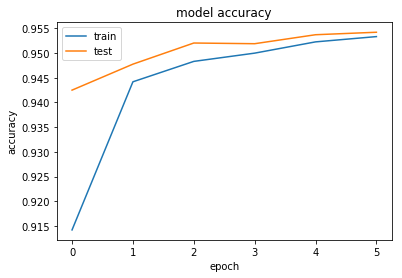

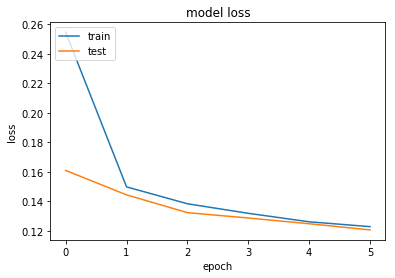

In [119]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [9]:
# Evaluation on a single instance using toxic_lstm.pkl
import pickle
with open('outputs/tokic_lstm.pkl','rb') as pickled_file:
    model_lstm = pickle.load(pickled_file)
    pickled_file.close()

Using TensorFlow backend.


In [130]:
for i in range(7):
    print(X[i])
    print()

Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren vandalisms just closure on some GAs after voted at New York Dolls FAC And please don remove the template from the talk page since m retired now 

D aww He matches this background colour m seemingly stuck with Thanks talk January UTC 

Hey man m really not trying to edit war It just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info 

 More can make any real suggestions on improvement wondered if the section statistics should be later on or subsection of types of accidents think the references may need tidying so that they are all in the exact same format ie date format etc can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know There appears to be backlog on articles f

In [202]:
#instance = "Eres lo mejor que me ha pasado"
#instance = "Eres lo peor que me ha pasado"
instance = "How do you do!"
print(instance)

Fuck


In [203]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)
var = model_ann.predict(instance)
if var[0][0] < 0.5:
    print(var[0][0])

0.009483769


In [157]:
predictions = model_ann.predict(X_new)

In [161]:
for i in range(len(predictions)):
    print(predictions[i][0])

0.34875256
0.25016284
0.013304234
0.027023017
9.056926e-05
0.0005297065
0.017765135
0.00053724647
0.010477275
7.8201294e-05
0.009568095
0.78176653
0.00011622906
2.115965e-06
0.010793328
0.0016998351
8.5532665e-06
0.0039116144
0.25016284
1.7881393e-07
0.25016284
1.5437603e-05
8.997321e-05
0.1883513
0.0034676194
0.0046732426
0.25016284
0.007576853
0.25016284
0.014136016
0.025441617
0.0026719868
0.003162086
0.0026053786
0.038805187
0.25016284
0.0052339435
0.019509822
6.2584877e-06
0.3952075
0.25016284
0.25016284
0.109537065
0.08543578
0.25016284
0.0041428804
6.4224005e-05
0.017248183
0.0016635656
0.11354351
0.01249215
0.2023808
6.723404e-05
0.009649664
0.0005919039
2.0861626e-07
0.25016284
0.09472504
0.00043326616
0.016957074
0.0035601854
0.08575764
0.000723958
0.021147609
0.029117227
0.1765565
0.5980613
0.0016915202
0.2517014
0.25016284
0.0
0.0020283759
0.0026564598
0.00041866302
0.0011271238
0.25016284
0.09467003
2.3186207e-05
0.06716254
0.05116695
0.09685868
0.25016284
0.000118643045
0

0.17277282
0.0012410283
5.6952238e-05
0.044627935
0.25016284
0.25016284
0.25016284
0.0016021132
0.05930403
0.109425545
6.848574e-05
0.25016284
5.662441e-07
2.0503998e-05
0.041665792
0.022546768
0.09370491
0.14937729
0.13123915
0.03568256
0.018636137
0.07038626
0.107548326
1.090765e-05
0.00017735362
5.841255e-06
0.003425926
0.00032642484
0.0285227
0.011361331
0.016397357
0.0010157526
0.0793843
0.00029954314
0.003523171
0.25016284
0.08888924
0.0095329285
0.0065636933
0.0012684166
0.25016284
0.24130073
0.0023292303
0.14056468
0.0017068088
0.0025424063
0.0024095476
0.00060105324
5.3942204e-06
1.680851e-05
0.012168914
0.07631576
0.0103444755
0.039354295
0.0028614104
0.034852386
0.022072762
0.024826914
0.070635945
1.1920929e-07
0.00014194846
0.0002039969
0.0064611137
0.25016284
0.00437814
0.0054065287
3.7163496e-05
0.25016284
0.123345196
0.25016284
0.31020465
0.009400129
0.00031104684
0.25016284
0.0021739602
0.000672102
0.00035324693
0.06232056
0.8720113
0.0060968697
8.5413456e-05
0.00018432

4.61936e-06
0.018939495
0.090378135
0.009385735
0.07352495
0.2563639
0.05808088
0.0010005236
0.039690495
0.16499054
0.06998727
0.011912018
1.0341406e-05
0.028308213
0.09064162
0.00029847026
0.25016284
0.25016284
0.29158407
0.0010006726
0.0010607839
0.026635766
0.016240269
0.010654837
0.25016284
0.1153104
0.25016284
3.0696392e-05
0.0004709363
0.028236479
0.08820531
1.2516975e-06
0.0014157295
1.1920929e-07
0.25016284
0.0019492507
0.059691638
0.25016284
0.25016284
0.25016284
0.06362426
0.0030984282
0.06415188
0.00025486946
0.033102363
0.00022268295
0.0077151656
0.043914914
0.08603519
0.0003579259
0.010531247
0.00013804436
0.29445562
0.003342539
0.0009048581
0.25016284
0.00033909082
0.20527151
5.930662e-06
0.06048584
0.0018352866
0.0
0.019712508
0.04964444
0.0001962781
6.2584877e-07
0.25016284
0.0033599734
0.004193872
0.25016284
0.029196978
0.014235795
0.0035705864
0.28899908
0.00013911724
8.559227e-05
0.56745625
0.06405288
0.027731508
0.00623402
2.2649765e-05
0.010998189
7.1525574e-07
0.0

0.025683165
0.01927939
0.25016284
0.00048315525
0.9998471
0.17004421
0.0017690957
0.000121474266
0.25016284
0.003757298
1.1950731e-05
6.9230795e-05
0.027189732
0.25016284
0.13072619
0.25016284
0.008523792
0.13626325
2.8759241e-05
0.0053887963
0.0023775399
0.11124259
0.25016284
0.008903533
0.12636885
0.25016284
0.012004346
0.00026103854
0.75784767
0.0064131916
3.5375357e-05
0.102687895
0.13815537
0.25016284
0.026904583
1.1384487e-05
0.00023293495
3.325939e-05
0.19709975
0.02711618
2.9742718e-05
0.0073254704
0.10423511
0.0134732425
0.01846236
4.2021275e-05
0.0012969673
3.3408403e-05
0.0030756295
7.0780516e-05
0.050313562
0.00883764
0.028571397
0.0004659593
0.25016284
0.0019455254
8.940697e-07
0.0018377304
0.25016284
0.20339689
0.16111538
0.23483407
4.029274e-05
0.0071748793
0.07580724
0.0022178888
0.25016284
0.25016284
0.036833286
0.00017476082
0.2727275
0.013010323
0.0048011243
0.04599455
0.0391472
0.21797255
0.014968693
0.02406177
0.026922733
0.014231563
0.0013611913
0.0004682541
0.250

0.059136093
0.022123069
0.12314072
0.00035113096
0.00024682283
0.004755944
0.004786074
0.0044094324
2.9802322e-08
7.036328e-05
0.05199009
0.117492825
0.25016284
0.00014472008
0.13115099
0.049378186
1.5884638e-05
0.12934178
0.08744463
0.031063765
0.00038859248
0.110901654
0.0006060004
0.0010738075
0.0023146868
0.0039685965
5.030632e-05
0.30512804
0.007860512
0.25016284
0.0067122877
0.25016284
0.012654215
0.011413455
0.045989484
0.05629942
0.10069254
0.12546593
0.0045910776
0.004253596
9.9778175e-05
0.12988195
0.000102847815
0.020569175
0.038467973
0.25016284
0.0006752014
0.006382793
0.00033915043
0.004158616
0.011556059
0.013935894
0.25016284
0.0010505021
0.00015062094
0.025440961
0.00014775991
0.30788398
0.08078024
0.09578985
0.019200385
0.037780225
0.0008713305
0.06981936
3.6269426e-05
0.052898318
0.053394437
0.008533627
0.095255196
0.007152796
0.25016284
0.14187756
0.25016284
0.25016284
0.25016284
0.25016284
0.012225777
0.25016284
0.25016284
0.0073572695
0.0031285286
0.004135579
0.00

0.036314517
2.861023e-06
0.018979698
0.25016284
0.0011010468
0.04570222
2.2232533e-05
0.0010293424
0.0019369125
2.2947788e-06
0.25016284
0.0011124313
0.107574224
0.0022484958
0.15073004
0.0023778975
0.25016284
0.25016284
0.25016284
0.00066426396
0.0026257038
0.003873825
0.25016284
0.25016284
0.0016323328
0.0013518035
0.0025985837
0.25016284
0.007866412
0.01606229
6.389618e-05
0.010312587
0.3751169
0.02662927
0.073928475
0.0023363233
0.0061047077
0.0033259392
0.028258622
0.0031304657
0.019565552
0.25016284
0.004051566
0.25016284
0.044644296
0.00066933036
0.13447487
0.14192131
0.00011253357
0.3877831
2.104044e-05
0.0029999316
0.03201264
0.27914023
0.022349894
0.25016284
0.07430345
0.011907607
0.0033617318
0.0005752444
0.25016284
0.01625827
0.004854858
0.070794314
0.09712574
0.00033518672
0.00354442
0.0032711327
0.25016284
1.1920929e-07
0.0031166077
0.08810547
0.25016284
0.00057443976
0.25016284
0.25016284
0.029600292
0.029166043
0.14096797
0.0072648823
0.16647646
1.6450882e-05
0.18322253

0.002535224
0.87117386
0.029255241
0.25016284
0.07123682
0.002322197
6.2584877e-07
0.017448068
0.0013751686
0.25016284
0.048947603
0.0034010112
0.007914901
0.04318154
0.00034242868
0.011146694
0.0006816089
0.00011202693
0.002744168
0.008665919
0.028581262
0.018096209
0.040049016
0.12216818
0.00014027953
0.0053741336
0.25016284
0.082615495
0.029620707
0.00012379885
0.25016284
0.009391904
0.40669698
0.037955493
0.0008546114
0.038612217
0.047935605
0.00015684962
2.6851892e-05
0.00013881922
0.030799925
0.25016284
0.05262339
0.06308648
0.2305575
0.42919928
7.498264e-05
0.25016284
0.25016284
0.09515235
4.172325e-07
0.025090218
1.9967556e-06
8.806586e-05
0.105590284
0.0049403906
0.00060740113
3.2782555e-07
0.25016284
0.004594505
0.00012999773
0.0012917221
0.10058653
0.01763323
0.25016284
0.0018891394
0.0012829304
0.032150626
0.008446455
0.11188084
0.10259989
0.017931491
5.4240227e-06
1.1950731e-05
0.31672567
0.062376976
0.009710938
0.022179216
0.22259325
0.11274445
2.4735928e-06
0.07124925
0.

0.21934238
0.040879786
0.006927371
0.018835783
0.25016284
0.0013715625
0.011460185
0.0020280778
1.7225742e-05
0.0056037605
0.25016284
0.00034815073
0.15017816
0.05426991
0.25016284
0.0333865
0.0055216253
0.00024059415
0.010424793
0.00033679605
0.00020581484
0.01674825
1.2218952e-06
0.0127726495
0.0020509064
0.03212124
0.00093731284
1.6093254e-06
0.0031999946
0.0011540353
0.07438359
0.10787627
0.04028961
0.0020477176
0.0005412698
0.1671961
0.08513683
5.364418e-06
0.25016284
0.011546195
2.592802e-06
0.007379204
0.25016284
0.0008941591
0.4276561
5.2422285e-05
0.0020044744
0.005598098
0.25016284
0.046803653
0.00013184547
0.4412089
0.0049027205
0.099304676
0.00011086464
0.0058508813
0.14937729
0.0011264086
0.25016284
0.006124854
0.035237074
0.06805819
0.25016284
0.0068603754
0.037317693
0.001937896
0.25016284
0.108712226
0.0021664798
0.0032856166
0.01971227
0.15756503
0.00041604042
0.0003103912
5.9604645e-08
0.0005610585
0.035349697
0.005509585
0.05762425
0.100886405
0.014002115
0.008630007

0.25016284
0.139198
0.0066199303
0.41762763
0.1195119
0.25016284
0.0012321472
6.28829e-06
0.0005903542
0.10757604
0.17902932
0.0002631247
0.7178426
0.0035665035
1.1622906e-06
0.25693157
0.05455154
0.0013826191
0.008856475
1.8686056e-05
0.008550912
0.00014775991
0.0030343235
0.0025149882
0.021686941
9.456277e-05
0.027369976
0.021003664
1.1920929e-07
0.00036424398
0.015889585
0.0017216802
0.0030715764
0.01968196
0.02469194
6.553531e-05
0.00017726421
0.00010216236
0.2975228
0.003309697
5.066395e-07
0.011571437
3.159046e-05
6.0498714e-06
0.006292999
0.22384214
0.00038519502
1.9967556e-06
0.00010216236
0.00012883544
0.009438366
0.03469336
0.013130873
0.0005477369
8.323789e-05
0.25016284
0.10375607
0.00034070015
0.25016284
2.8848648e-05
0.050459683
0.00050264597
0.11423448
0.25016284
0.0050083995
0.25016284
0.00017929077
0.0014214814
0.029874563
3.516674e-06
0.0003195107
0.0040543377
0.0009588599
0.11730412
0.25016284
0.068307936
0.002506882
0.035616487
0.019280493
2.7865171e-05
0.044394284


0.0015719831
0.0625754
0.00015056133
0.012216747
0.0031630695
0.00046673417
0.12886557
0.25016284
0.04908365
0.036905706
8.919835e-05
0.25016284
0.09424052
0.00045251846
0.0040035844
0.25016284
0.0037635267
0.010069549
0.0
0.0013062358
0.25016284
0.46728915
0.00016099215
2.7269125e-05
0.25016284
0.019327223
0.0077848136
0.0006212592
0.00031855702
0.00016245246
0.25016284
0.00042146444
0.25016284
0.008407533
0.0
0.0033067763
0.012503862
0.25016284
0.00015622377
0.0020786822
0.083256245
0.45507938
0.0025648475
0.00019726157
0.12483382
0.0006016195
4.5597553e-06
0.149153
0.006120324
2.9981136e-05
0.00046005845
0.007831633
0.00019466877
0.024018347
0.25016284
0.04319486
0.010326356
0.26672694
0.00041526556
0.0017971992
0.0038773715
6.0915947e-05
0.25016284
8.916855e-05
0.14602935
0.11320278
0.045200914
0.0030868053
0.0024698973
0.14402747
0.00874728
0.028372586
1.2397766e-05
0.0032514632
0.0031747818
0.10322183
0.25016284
0.0015045702
0.25425908
0.03416443
0.00020954013
0.25016284
0.025092

0.00043079257
0.028642505
0.025532514
0.100342155
0.0036785305
0.0053277314
0.14425573
0.07170874
0.25016284
0.010733217
0.014956832
4.3809414e-06
0.0006997287
4.61936e-06
0.00094893575
0.021190792
0.03142354
0.25016284
0.00027754903
2.5302172e-05
0.46358865
0.0023671389
0.017717093
0.00685966
0.01090616
0.011754304
6.598234e-05
0.027109414
0.00034230947
0.19943923
0.17205176
0.011904389
0.09424052
0.012832493
0.25016284
0.027310163
0.123883456
0.0011247694
0.15297377
0.0021223426
0.675056
0.010902792
0.0021057725
0.25016284
0.0024282634
0.00030830503
0.00047671795
0.0004092157
0.0002270937
0.25016284
0.25016284
0.25016284
0.028630495
0.024157703
2.9802322e-08
0.078121364
0.12499139
0.00319165
0.25016284
0.25016284
0.0003222823
0.008506507
0.0006469488
4.7534704e-05
0.04741007
0.0041348636
1.8775463e-06
0.0001155138
0.25016284
0.25016284
0.0013391376
0.023172587
0.025468856
0.017506301
0.25016284
0.1706006
1.9669533e-05
9.387732e-06
1.3053417e-05
0.15892032
1.3828278e-05
0.0006686449
0

0.10649684
1.7881393e-07
0.012586534
0.0012826324
0.024449825
0.13925603
0.012733638
0.03737393
0.03220868
0.0024282634
0.010166705
0.00030946732
0.02017948
0.25016284
0.0596852
0.097759336
9.357929e-06
0.0012987852
8.499622e-05
0.057582766
0.00717178
0.28157824
0.0037347376
0.02162391
0.25016284
8.9854e-05
0.0073834658
0.25016284
0.06251541
0.009633601
4.1037798e-05
0.13253525
0.06169665
0.25016284
1.7881393e-07
0.05152127
0.0022868514
0.0012629032
0.020072728
0.25016284
1.1950731e-05
0.2605384
8.9108944e-05
0.25016284
0.008027345
0.0033977628
6.9111586e-05
0.00063952804
0.010481477
0.25016284
0.00016963482
0.0005122721
0.008737713
0.22444284
0.0022311807
0.0039645433
0.09121522
0.27944732
0.024317265
0.0042043626
0.25016284
0.0023930669
2.3841858e-06
0.21303952
0.000111073256
0.00016283989
0.00012135506
0.64344823
0.011159033
0.0071771443
0.00041234493
0.00011610985
0.25016284
0.25016284
7.984042e-05
2.9802322e-07
0.09424052
0.25016284
0.0015488863
0.0038965642
0.00974077
0.07204765


0.20573363
0.05401641
0.0019654632
0.25016284
0.0027413964
0.0021624863
0.104781866
0.019728541
0.25016284
3.5852194e-05
0.4387904
1.7881393e-06
0.43187433
0.00030642748
8.940697e-08
0.005158335
0.25016284
0.1652002
6.8455935e-05
0.25016284
0.016063869
0.022136569
2.8014183e-06
0.3952655
0.11783409
0.03625819
0.0068153143
0.0010288954
0.13295892
0.0038526952
0.24549371
0.25016284
0.0060142875
0.5983318
1.564622e-05
0.25016284
0.25016284
3.796816e-05
0.045805722
0.01135847
0.0067073107
0.15756503
0.03896591
0.060299963
0.0031703413
0.06295121
0.002290696
0.0074234307
0.001014471
0.25016284
0.0013217628
6.7949295e-06
0.25016284
6.389618e-05
0.0062776506
0.008284301
0.06856984
0.12883177
3.1083822e-05
0.03681031
2.0891428e-05
0.0077443123
8.824468e-05
0.014712691
0.019062608
0.25016284
0.0006040633
0.0045033395
0.0062696934
0.14937729
9.328127e-06
0.00012332201
0.080706775
0.0046831667
0.00034430623
0.102885485
0.00014993548
0.025915742
0.06351289
0.25016284
0.25016284
0.061846375
0.00173

0.010742903
0.08040118
0.25016284
0.011270404
0.0045455694
0.25016284
7.7068806e-05
0.032975167
0.051725417
0.026275426
5.00679e-06
0.0012730658
0.00060236454
0.25760794
0.25016284
3.5762787e-07
0.25016284
0.30699104
0.01102066
0.00042164326
0.06553316
0.10129228
0.23583701
0.024302334
7.033348e-06
0.0023705065
0.25016284
0.054861277
0.0006362796
0.025420606
0.047588587
0.09424052
9.864569e-05
0.012150437
0.25016284
0.0005874038
0.44620442
0.004583925
0.00022622943
0.037560165
0.0026269555
0.00028133392
0.054938078
0.000757426
0.0008660853
0.048455566
2.6524067e-06
0.0024419725
0.35753942
0.006748289
0.00072419643
0.00019210577
0.00013107061
0.00037270784
0.80889285
0.010363817
0.0001938641
0.0420973
4.053116e-05
0.023758262
0.11629775
0.25016284
0.15696955
0.062678695
0.0005925596
0.00048717856
0.0031149387
0.0011616349
2.7000904e-05
0.0020393431
2.2351742e-05
0.00019264221
0.0013870597
0.008603811
0.006298125
0.0007839799
0.0028397143
0.17271245
0.40098095
0.025225788
4.810095e-05
0.

0.011251271
0.0013310313
0.007626891
0.25016284
0.00011488795
4.4703484e-07
0.016519189
0.87150025
0.0029084086
0.07896885
0.0007124543
0.00097617507
0.09587374
0.020109594
0.25016284
0.010590315
0.25016284
0.0033156574
0.0015840828
0.0017102659
0.25016284
0.18212453
0.00013616681
0.047396004
0.009976685
6.070733e-05
0.21284881
0.011749774
0.011276126
0.006989032
0.009941876
0.01026994
0.25016284
0.0013421178
0.0015613437
0.0008290112
0.25016284
0.04012221
0.008831561
0.0013119578
0.00065144897
0.11161977
0.01791355
0.25016284
0.001809597
0.0022880137
0.003722161
0.06311071
0.021947563
0.0029937923
0.08382729
0.25016284
0.019664824
0.16171426
0.014255077
0.0072261095
0.008891046
0.25016284
4.2915344e-06
0.25016284
0.042550385
0.25016284
0.049636215
0.005657017
0.074435264
0.00047528744
0.0020792186
0.25016284
0.28129166
0.25016284
0.08645111
0.32049298
0.11299276
0.017475039
0.029078871
0.0008868277
0.0009865761
0.017004967
0.009168446
0.030848056
0.0005072355
0.020310163
0.009674251
0

0.006242603
0.25016284
0.02943024
0.0005428791
0.0011433363
0.25663337
0.002890557
0.25016284
0.043232888
0.004882008
0.40994772
0.0008763075
0.00064635277
0.25016284
0.25016284
0.010206759
0.16698006
0.002664268
0.024785876
0.25016284
0.00035619736
0.15820041
0.0011833608
0.25016284
0.012038797
0.001696229
1.2457371e-05
0.0048861504
0.00031733513
0.05254382
0.074961394
0.27651894
0.008929282
3.1888485e-06
0.0056311786
0.0035903156
0.037124127
0.021038502
0.010158479
0.064965904
0.0128796995
0.099850565
0.016492337
0.014649749
0.000106692314
0.03878209
5.364418e-07
0.015648812
0.19488731
2.336502e-05
0.0328674
0.00022810698
1.0430813e-06
0.25016284
0.025096595
0.0004980862
0.06875977
0.25016284
0.00044494867
2.9325485e-05
0.07768637
0.0013581812
0.25016284
0.00040209293
0.25016284
0.007613361
3.4570694e-06
0.052823007
0.1619803
0.39774197
0.25016284
0.00025713444
0.0008381307
0.0002886653
0.009523094
0.0001821816
4.1127205e-06
0.0023287237
0.25016284
0.0008196533
0.0008994341
0.0004081

1.1920929e-07
0.0
0.25016284
0.15547502
0.00075259805
0.25016284
0.29150614
0.0002824068
0.012354165
0.027713
0.25016284
7.4476004e-05
0.030847788
0.25016284
0.0019675791
0.07397759
0.037019372
0.0058000684
0.07607934
0.013027668
0.028200448
0.25016284
0.004065186
1.8179417e-06
0.09091395
0.06757823
0.012950182
4.0233135e-06
0.00064757466
0.00017011166
0.00032028556
0.25016284
0.0016405284
0.0016902685
0.07606593
0.25016284
0.07138035
0.15569898
0.4789964
0.009721249
0.0033880472
0.0021007955
0.00023850799
0.0060271025
0.051795363
0.048898757
0.039313167
0.09531891
4.8071146e-05
0.04396361
0.043640584
0.0009510219
0.02159667
0.00075009465
0.2773975
0.10656819
0.37140113
0.037623316
0.5340964
8.499622e-05
0.00012302399
0.25016284
5.4836273e-06
7.468462e-05
0.25016284
0.0005759299
0.25016284
3.4421682e-05
0.03635323
0.0032592416
0.00018703938
0.14937729
0.25016284
0.0006788075
0.001760453
1.5497208e-06
0.043955445
0.003451556
0.019560337
0.071835935
0.009221941
0.04005915
2.7120113e-06
2

8.106232e-05
0.12206021
0.005030751
0.0044583976
0.0025671124
0.009945899
0.05859068
0.050391763
0.41648626
0.0032252073
0.10775426
0.01276201
0.2206876
4.351139e-06
7.867813e-06
0.1884327
0.22526449
0.0003873706
0.25016284
0.000623405
0.019894391
3.9309263e-05
0.0019403696
0.0008612573
0.002542913
0.030539632
0.0006825328
0.043488115
0.0055487454
0.0017484725
5.465746e-05
0.00025632977
0.04383722
0.0062999427
6.6399574e-05
0.25016284
0.008046359
0.038980782
0.0037923455
0.00045970082
0.0025408864
0.25016284
0.008101791
0.17939308
0.25016284
0.04816097
0.23147556
0.002676189
0.0023749769
0.25016284
0.0012949705
0.32043937
0.00085771084
0.020591855
0.010896683
0.03360498
4.4703484e-07
0.005965084
0.00017336011
2.1070242e-05
0.001203388
0.0015589893
0.022366792
0.16757372
0.25016284
3.2782555e-06
0.25016284
0.18646973
0.04821837
0.25016284
0.0001206696
0.061611623
0.018460274
0.03831801
0.012670726
0.0022470057
0.08611095
0.0
0.25016284
0.028347522
0.43396807
0.00046044588
0.00058689713


0.006987959
0.00063049793
2.1100044e-05
0.000121861696
0.00032666326
0.008929968
0.25016284
0.042575657
0.050604165
0.003671199
0.017284423
0.0011966825
0.03377217
0.25016284
0.0025328994
0.0037923455
0.008279055
0.0002180934
0.0014784634
0.021227747
3.0994415e-05
0.0019633174
0.025095582
0.10255572
0.25016284
0.00017863512
0.0005275309
0.25016284
0.069758564
0.25016284
0.0005865991
1.1444092e-05
1.3113022e-06
0.25016284
0.0014995635
0.10885885
0.8833886
0.014545232
0.061131686
0.0067288578
0.011171907
4.172325e-07
0.008464366
0.028317392
0.928391
0.00047302246
1.0848045e-05
7.665157e-05
0.00022169948
6.9737434e-06
0.00031617284
7.5101852e-06
0.0028520226
0.25016284
0.25016284
0.0027147532
0.05078134
0.0010135472
3.6656857e-05
0.09742302
1.5795231e-06
0.00039303303
0.026890367
0.05979851
0.25016284
0.0021133423
0.25016284
0.006071061
0.004755646
0.01954481
0.25016284
0.051139593
0.0006084442
0.009690255
1.4960766e-05
0.0620358
0.011796266
0.089044064
0.0010668635
0.014927298
0.25016284

0.25016284
0.004588574
2.8848648e-05
0.004495561
0.25016284
0.25016284
4.3213367e-06
0.25016284
0.25016284
0.15070492
0.001804471
0.01010105
9.1940165e-05
0.27340844
0.0088
0.25016284
0.25916547
0.27557966
0.00022742152
0.0039919615
0.00033810735
0.00038430095
0.028737605
0.0012196302
0.0060025156
0.18281412
0.0049631596
0.016604543
0.25016284
0.0021651685
0.24586472
0.004004091
0.00063186884
0.04939741
0.022854537
0.0023914874
0.10714868
0.25016284
0.55293804
0.0013035536
0.0026123524
0.00043424964
8.0138445e-05
0.15741491
0.0026248097
0.046446383
0.03776145
0.0037195385
0.25016284
0.25016284
1.0848045e-05
2.5302172e-05
0.011040747
0.9999607
0.00555861
1.1920929e-06
0.09562254
0.046497524
0.3372771
0.00055393577
4.7773123e-05
0.0030055344
0.0025897622
0.037341684
0.0001872778
0.029674828
0.02444315
0.048666745
0.0064123273
0.00040861964
9.641051e-05
0.00017371774
0.029641539
0.00029727817
0.06503689
1.2785196e-05
0.008815408
0.06607348
0.0001205802
0.00017219782
0.25016284
0.08282074


0.012608439
0.0061027408
0.0025732517
0.00030702353
5.9604645e-08
0.086137354
6.556511e-05
0.15835732
0.046682507
7.480383e-06
0.0002130568
0.0204058
9.196997e-05
0.015569121
0.03296286
0.0011674464
1.49309635e-05
0.3733549
0.15756503
2.7656555e-05
0.25016284
1.7881393e-07
0.25016284
0.00032168627
0.25016284
0.0051397085
0.014380753
0.0048907697
0.010918707
0.0010252893
0.0005170405
7.390976e-06
0.000101327896
0.25016284
0.04838881
0.25016284
0.0009813309
0.0051202774
0.006302893
0.00025692582
0.008472621
0.11124259
4.172325e-07
0.0045663416
0.00012421608
0.0040765107
0.009683013
0.047950715
0.042561293
0.022349894
0.00015208125
0.0043849647
0.035036206
0.005970508
0.0046312213
0.004859209
0.0005656779
0.00016194582
0.00073707104
4.926324e-05
0.15579158
0.08643177
0.25016284
0.00039994717
0.0046519637
1.4901161e-07
0.00051292777
0.0061126947
1.66893e-06
0.013276994
8.7440014e-05
0.011250019
0.073853105
0.011744171
0.02092278
0.011274844
0.021798015
0.21012598
0.0139353275
0.36962736
0.

0.0049960315
0.25016284
0.0039584935
0.25016284
0.7200338
0.00025722384
0.00979352
0.25016284
0.004360229
0.024368286
0.0046210587
0.00058090687
0.0009585619
0.0008315742
0.00076651573
0.0013821125
0.25832886
0.08839813
0.0018287003
0.18772289
0.25016284
0.015583515
0.009461939
0.025674284
0.13246304
0.006334305
0.015530258
0.25016284
0.0033645332
1.5109777e-05
0.13331312
0.020158261
0.003020823
0.0003413856
3.6418438e-05
0.035484135
0.14830527
0.14336058
0.027218103
0.29713908
0.0016255379
0.46354797
1.731515e-05
3.3050776e-05
0.082194686
0.25016284
0.00014922023
0.25016284
0.0132342875
2.8550625e-05
0.12447739
0.25016284
0.008190453
0.07431376
0.0030436814
0.0013974011
6.0796738e-06
3.6865473e-05
0.0053518116
0.0334526
0.12297031
0.00011253357
0.12059471
0.064763844
1.7613173e-05
0.002294898
0.0001296103
0.00023955107
0.0019494295
4.8041344e-05
0.0004245937
0.25016284
0.0016263127
0.0011710227
0.003917843
0.0057263076
0.16892657
0.0037297606
5.364418e-07
0.005428076
0.25016284
0.0085

0.1572583
0.3016065
2.1785498e-05
0.048374802
0.008895099
0.25016284
1.013279e-06
0.0032379627
0.043049008
0.0881823
1.758337e-06
0.045450658
0.011121988
0.085552335
9.596348e-06
0.08238062
0.0017958283
0.09736198
0.06850335
0.03619224
0.0032004714
0.00023955107
0.25016284
0.04501012
0.25016284
0.08481777
0.10816085
0.053486943
0.0032383502
0.010549873
0.008780479
0.0069573224
0.25016284
0.013098478
0.06992155
0.051451147
5.662441e-07
0.0006106198
0.27913707
0.00029957294
0.00022575259
0.25016284
0.027642787
0.03984633
0.26612732
0.25016284
0.00015333295
0.051908344
0.25016284
0.014931709
0.25016284
0.0015835166
0.030340612
0.006920278
3.5464764e-05
0.00056007504
0.05942288
0.001155436
0.25016284
0.0019633174
0.05533442
0.00089618564
0.0029801726
0.006447941
0.006011814
0.0016828179
0.008962095
8.940697e-08
0.007324308
0.0005238652
1.7434359e-05
0.003342539
0.001459986
0.001452446
0.25016284
0.051807195
0.02250138
2.360344e-05
0.25016284
0.05458659
0.25016284
0.0093125105
0.014241576
2

0.054599404
0.25016284
0.0043748915
0.0037923455
0.25016284
0.040700257
0.25016284
6.7949295e-06
8.755922e-05
0.09575528
0.0027337968
0.2766198
8.499622e-05
0.056070626
0.25016284
0.018535256
0.0022023022
0.035895914
0.02764225
0.00892508
0.007900178
0.0041356087
0.25016284
0.055703193
0.25016284
0.25016284
1.5497208e-05
0.015571147
0.022693336
0.051370353
0.25016284
0.00015231967
0.00014901161
0.00023955107
0.004691243
0.15756503
0.2464684
0.00095674396
0.011416763
0.03647554
0.060359776
0.5500902
0.081198126
0.0011065304
0.25016284
3.2782555e-07
0.25016284
0.00046500564
0.00033819675
0.047074705
0.25016284
0.25016284
0.0013494492
0.13277814
0.01415506
0.25016284
0.38511747
0.116140634
0.0018119216
0.25997972
0.0014332235
1.1026859e-06
0.000246495
1.8149614e-05
0.00055089593
2.4139881e-05
0.25016284
0.0005309582
0.25016284
0.00011253357
0.00152269
6.300211e-05
0.25016284
0.003931612
0.004489124
0.37317052
0.0020703077
0.003342539
0.00021278858
0.09093186
0.13753673
0.529528
0.25016284

4.568696e-05
9.4652176e-05
1.8179417e-06
0.0032407045
0.00096288323
0.0033017397
0.019607008
1.6331673e-05
0.0053513646
0.0023450851
0.25016284
0.25016284
0.0006990731
0.35916716
0.09742883
0.026472062
0.25016284
2.3007393e-05
0.013554275
7.1525574e-07
0.021811575
0.1008032
0.00010377169
8.499622e-05
0.0029777288
0.022524327
4.979968e-05
5.3226948e-05
0.5345061
0.003942609
0.0033641458
0.008299112
0.045376748
3.8951635e-05
0.002992332
0.29505715
1.9848347e-05
0.00092324615
0.25016284
0.0025919378
0.009202391
0.03776735
0.026414037
0.00027921796
0.0008032024
3.5762787e-06
0.10876468
0.025643319
0.00033453107
0.0023445487
0.05674374
0.0016129613
0.014405042
0.00021025538
0.25016284
8.34465e-07
8.961558e-05
0.008914411
0.0
0.25016284
0.27329135
0.0012396574
0.004445821
0.0034140646
0.25016284
0.004416406
0.00058689713
0.00074240565
5.9604645e-08
0.031239927
0.02756679
0.0009699464
2.3841858e-06
0.0085244775
0.00092592835
0.01904437
0.001368314
0.050723255
0.0017181337
0.04234743
0.0015362

0.101735234
0.030478746
0.00030511618
0.15644082
0.0033503473
1.8686056e-05
0.015829712
0.0004682541
0.25016284
0.00011539459
0.0031373203
0.25016284
0.050343513
0.08168954
0.011561513
0.025826573
0.07383585
0.1999436
2.9236078e-05
4.8816204e-05
5.364418e-07
0.25016284
0.010335326
0.022257656
0.0013323128
0.25016284
0.15696955
5.662441e-07
0.017109394
0.25016284
0.0011573732
0.0010267794
0.033667326
0.00022998452
0.035614073
0.0049108863
0.2503969
0.47495326
0.08690727
0.06422472
0.00013548136
9.745359e-06
0.006508261
0.00087979436
0.04606557
0.15784118
0.05604279
0.005015373
0.23283455
0.25016284
8.556247e-05
5.662441e-07
9.599328e-05
0.010693729
0.25016284
0.24191102
9.590387e-05
0.041737974
0.19062975
0.027610272
0.019629687
0.0006724298
0.319116
0.00013506413
0.0004762411
0.010051191
0.020079494
0.25016284
1.6093254e-06
0.004707217
1.4901161e-06
7.748604e-07
0.007235378
0.010700226
1.7106533e-05
5.7786703e-05
0.07960221
0.25016284
0.25016284
0.25016284
6.80387e-05
1.8835068e-05
0.2

0.008574098
0.25016284
0.025807917
0.24829555
0.021392047
0.010412484
0.00053730607
0.06913975
0.05067894
0.00031590462
0.25016284
0.07380161
0.0033946335
0.03752485
0.012889653
0.25016284
0.013211697
0.012558669
0.25016284
0.00011244416
0.00092861056
0.012924671
0.0036025941
0.035016924
0.25016284
0.25016284
0.25016284
0.0
0.010812372
0.0015243888
0.011334151
0.25016284
0.0003427267
6.791949e-05
0.003997475
0.0036198497
5.6296587e-05
0.007761508
0.25016284
0.053566933
0.004845202
0.006353706
0.0044698715
0.0005236864
3.3557415e-05
0.2975228
3.0994415e-06
0.25016284
0.25016284
0.00034362078
0.010200709
0.25016284
0.0055713356
0.0021389723
0.0032541752
0.07439771
0.25016284
0.00053080916
0.00034728646
2.8073788e-05
0.0049033463
0.25016284
0.026352763
0.25016284
0.25016284
0.022832185
0.25515985
6.2584877e-07
0.03736788
0.25016284
0.00013327599
8.6426735e-06
2.0772219e-05
0.0058000684
0.13928503
6.0498714e-06
0.004225403
8.821487e-06
0.081318825
0.025969923
0.017340273
3.451109e-05
0.250

0.25016284
0.00038453937
0.23551318
0.00025609136
0.25016284
0.002711445
0.34719864
0.25016284
0.0851911
8.225441e-06
0.0022273064
8.076429e-06
0.00259462
0.016315132
2.0563602e-06
0.25016284
0.11883262
0.20494354
0.014291465
0.00093209743
0.00016397238
8.496642e-05
0.11862621
0.25016284
0.0064845085
3.0100346e-05
0.004604459
0.17317575
0.0014290214
0.028436333
0.083967686
0.11407903
0.10499492
0.0014886856
0.25016284
3.2246113e-05
0.035624832
0.0061604977
0.00022265315
0.004387319
0.04612884
0.25016284
0.00030061603
0.0032669306
0.08616763
1.1622906e-06
0.02456966
9.179115e-06
0.00018450618
0.0
0.020823032
0.08946541
0.015548736
0.25016284
0.029692829
0.13547754
0.0029762983
0.0020909905
2.0861626e-07
0.0002990663
0.002583295
0.0036613047
0.078390986
4.3183565e-05
0.23124912
0.011433154
2.3841858e-06
0.1564712
0.0
0.25016284
0.08279443
0.0039609075
0.055241734
0.0030157268
0.010213554
0.0015114844
1.1920929e-07
0.00032535195
0.14246038
0.008418292
0.0068950057
0.25016284
7.742643e-05


0.25016284
0.2320967
0.120244354
0.29166114
0.08603126
0.24911422
0.04766977
0.012355715
1.463294e-05
0.0677636
0.027805567
0.17453307
0.0074719787
0.25016284
6.020069e-06
0.21866345
0.017765135
0.005506426
0.002157122
0.12570846
0.00025689602
0.0001013577
0.25016284
0.25016284
0.10259989
0.11094597
0.00010475516
0.25016284
0.17650089
0.25016284
0.9580637
0.014872551
0.67333376
0.00017377734
0.25016284
2.8312206e-06
0.004188895
0.061729193
0.08379245
0.0026942194
0.25016284
7.5012445e-05
0.0056689978
1.4156103e-05
0.0055271387
0.10259989
0.25016284
0.004188299
0.047718972
0.17935646
0.005742222
5.0753355e-05
0.10449448
0.25016284
0.030528784
8.940697e-08
0.25016284
0.001085341
0.020204037
0.009886086
8.314848e-06
0.20201191
0.028369844
0.0010014772
0.25016284
0.00016152859
1.1831522e-05
0.25016284
2.115965e-06
0.0002487898
0.0034351945
0.25016284
0.0667083
2.3543835e-05
0.038092315
0.25016284
0.7381721
0.000107616186
0.06277105
0.019946814
0.048069507
0.25016284
0.0021623373
0.0470019


8.687377e-05
0.25016284
1.5884638e-05
4.798174e-06
0.019849092
0.25016284
1.1622906e-06
5.9604645e-08
0.1778205
0.026968032
0.11998564
0.0011152923
0.05043283
0.25016284
0.066616505
0.1062907
0.0013886988
0.0286524
0.00014063716
0.074341536
0.007853329
0.29192168
0.0140585005
0.012140542
0.00203982
0.0028333664
0.0007534623
0.007316649
0.0055211484
0.0020867288
0.03957367
0.00084117055
0.337861
8.252263e-05
0.25016284
0.3293264
0.15284804
0.002268821
0.0061309338
0.25016284
5.9515238e-05
0.0050727427
0.25016284
0.026780397
0.6668419
0.035366684
0.0020106137
0.009532541
0.04120177
0.01096952
0.002972275
0.0033503473
0.0055960417
0.10047528
0.05844891
0.014761299
0.0015672147
0.01630646
9.23872e-07
0.1440646
0.0
0.25016284
0.0003259778
0.00085940957
0.0021717548
1.4722347e-05
0.019795835
0.09448624
0.009457201
0.0023778975
1.8417835e-05
0.25016284
0.25016284
0.008699775
0.093423635
0.023575157
0.0472475
0.0003080964
0.072707
0.0009662807
0.00014305115
0.25016284
0.0011999905
0.25016284
6

0.005898416
0.01236701
0.0015372336
0.00020608306
0.037929684
0.0006778836
0.01060769
1.9311905e-05
0.006462127
0.025476396
0.03903407
0.25016284
0.0718579
3.7640333e-05
0.0015290976
2.413988e-06
0.020434767
0.0026075244
0.046359867
0.031229407
0.25016284
0.25016284
0.25016284
0.022212923
0.03627011
0.016329914
0.0008432567
0.008255899
0.00357911
0.25016284
0.00015065074
0.030204803
0.04984781
0.3209746
0.0008049309
0.25016284
0.005447358
0.016459256
0.010690868
0.041045427
0.25016284
0.006264746
0.25016284
3.874302e-07
0.25016284
0.0004068613
0.49677563
0.01674524
0.00511539
0.0008994043
0.000115573406
0.00058069825
0.064276874
0.00021910667
0.039742768
0.02675423
0.03156057
7.799268e-05
0.016146958
0.042048097
0.0036355853
6.9737434e-06
4.568696e-05
0.5983318
0.02356109
0.25016284
0.05244878
0.0019227266
0.00074601173
0.0003630221
0.04286346
2.5898218e-05
0.00021919608
0.25016284
4.044175e-05
0.010636687
0.25016284
0.25016284
0.02355811
0.012271792
0.25016284
0.010708541
0.0072427094

2.8371811e-05
0.17355552
0.00801909
0.016527861
0.0035143495
0.15696955
0.024215579
0.25016284
0.013744146
0.05454132
0.0
0.046634167
0.0033627152
0.121460974
0.028569162
0.00033339858
0.08844933
0.043361634
0.061267644
0.01968196
0.0019145906
0.004342377
9.030104e-06
0.0049680173
0.25016284
4.3958426e-05
0.087803125
0.25016284
0.001393646
0.002182424
0.25873697
0.00028771162
2.2649765e-06
0.00015479326
0.25016284
0.020960122
0.25016284
0.3527922
0.021568447
1.0
0.07210365
0.25016284
0.043628156
0.0016076267
0.07709038
0.062960654
0.0010955036
0.0020540059
0.25016284
0.0007580519
0.008735299
0.00021478534
0.00059857965
0.009864092
0.00014466047
0.0008876622
0.01025489
7.048249e-05
0.25016284
0.08611894
0.30056638
0.00023007393
0.038078398
0.00017026067
0.055061042
0.11857554
0.00791356
0.25016284
0.0013275743
0.08962357
0.098471284
0.25016284
0.014513284
1.9967556e-06
0.00097617507
0.25016284
0.012247711
0.25016284
8.6039305e-05
0.009427577
0.25016284
0.01838398
0.044085115
0.002287656

0.00094640255
0.11243126
0.008467972
0.007590711
0.12663516
0.036471248
0.14603361
9.995699e-05
0.25016284
0.011173308
0.00013074279
0.0007428229
0.009720445
0.0012738705
0.25016284
0.00020727515
0.00018620491
0.0032856166
0.0015585124
0.008235633
0.0005675554
0.001186341
0.028121352
0.25016284
0.09640384
0.005454421
0.51481587
0.0002962947
0.0002529025
0.3215009
2.3543835e-05
0.040826917
0.0004184544
0.011951178
0.009287775
0.000610888
0.00030469894
0.0019320846
0.25016284
0.17540109
0.0021165907
0.00058943033
0.0
0.10777882
0.25016284
0.047685325
0.25016284
0.019259691
0.027682632
0.25016284
0.25016284
4.720688e-05
0.051379442
2.1100044e-05
0.2064609
0.021381319
0.0028588474
0.25016284
0.004309863
2.115965e-06
0.25016284
0.30427042
0.0018680692
0.0028483272
0.25016284
0.00023937225
0.01635781
1.8686056e-05
0.08346248
0.12483382
0.060703337
2.2441149e-05
0.38967365
6.854534e-07
0.054778963
0.25016284
0.31790757
0.0057074428
2.4795532e-05
0.004616022
0.00059089065
0.0966112
0.25016284


0.007299334
0.5046384
0.039108068
0.0124748945
0.012764543
0.11562735
0.0
0.25016284
0.007026881
0.18335024
0.25016284
0.10913929
0.01160875
0.25016284
0.10998213
0.0012112856
0.039089233
0.09344491
0.0017092228
0.25016284
0.25016284
0.25016284
0.651469
0.25016284
0.139198
1.8924475e-05
0.004238546
0.054750413
0.13237053
0.0004710257
0.020520091
7.1525574e-07
0.024487019
0.00029087067
0.25016284
0.25016284
0.009360462
2.2649765e-06
2.5331974e-06
0.020444095
0.013571948
0.001242131
8.255243e-06
0.00029292703
0.057229042
0.0492253
0.0775798
0.011324286
0.00017651916
5.3673983e-05
0.09371582
2.0563602e-05
0.09093124
0.014010519
8.940697e-08
0.25016284
0.004280627
0.014635354
0.006831646
0.25016284
6.5267086e-06
3.1590462e-06
0.0063079894
0.013307333
0.076325715
0.023326635
0.016202718
2.9802322e-08
0.0027314425
0.09027332
0.07318887
0.014387488
0.05456987
1.3709068e-06
0.4652259
0.4828816
0.013529599
0.007300675
0.0042274
0.25016284
0.003545463
0.07450855
0.6665484
0.25016284
0.25016284
0

0.0037457645
3.683567e-05
0.23532158
0.0072514713
0.004662603
0.00023841858
0.25016284
0.00048932433
0.00073441863
0.0025134683
0.00018018484
0.25016284
0.0027092695
0.0027401447
0.004154533
0.25016284
6.753206e-05
0.00073060393
0.00016072392
0.25016284
0.25016284
0.00092440844
0.026370764
0.001612097
0.045764983
0.25016284
0.057300627
0.25016284
0.008755147
0.03692475
0.0383887
0.0006131232
0.0046880543
0.085856766
6.189942e-05
0.016665936
1.758337e-06
0.25016284
0.001494348
0.25016284
0.25016284
0.09063545
0.25016284
0.16006923
0.0009518564
0.0626224
0.0050204396
1.1920929e-07
0.00022289157
0.25016284
0.046453565
0.0071573853
0.079485625
0.003429234
0.04155585
0.00024718046
0.25016284
0.13731441
1.758337e-06
8.8721514e-05
8.940697e-08
0.00013718009
3.3587217e-05
0.01987353
0.12737328
0.072343856
0.00036275387
0.0056491196
0.25016284
0.057376117
4.172325e-06
0.012898922
0.25016284
0.00326097
0.16734713
9.584427e-05
0.009899408
0.14802
0.00032904744
0.01734668
0.0025162399
0.25016284
0

0.003541708
0.0014219284
0.36564016
0.007402241
0.08928338
0.00012400746
0.035827607
0.25016284
0.25016284
0.25016284
0.0019411445
0.25016284
0.001046449
0.0866386
0.051015675
0.0008854866
0.0018335283
0.00058591366
7.5399876e-06
1.0877848e-05
0.002997756
0.0010128021
1.8447638e-05
0.045713216
0.0038529634
0.04263258
0.25016284
0.0040856004
2.2619963e-05
0.06500712
0.00080546737
0.25016284
0.0007122159
0.0026530921
0.026822299
0.026250511
0.00045099854
0.008380532
0.00827077
0.2456196
5.990267e-06
0.2305575
0.022936225
0.00783819
0.51221794
0.11857554
0.14846036
0.25016284
0.00071263313
0.011266857
0.003991306
0.10729289
1.564622e-05
0.019811362
0.0063924193
1.6182661e-05
0.25016284
0.020497829
2.2679567e-05
2.4855137e-05
0.0058611035
0.012277216
1.8715858e-05
0.00013497472
0.25016284
0.22620374
0.25016284
0.000323534
6.2584877e-07
0.010635436
2.4557114e-05
3.027916e-05
0.0018999279
0.20675239
0.008883417
0.020090193
0.007593274
0.25016284
0.33731246
0.121035725
0.00034308434
0.2973082

2.232194e-05
3.5762787e-07
0.0455119
0.004707426
0.0632323
0.0014697015
0.23222482
0.0091792345
0.019481689
0.006833315
0.00652948
0.0099154115
0.46004972
0.016694307
0.25016284
0.016492218
0.00020733476
0.25016284
0.0009354055
0.022976965
1.7493963e-05
0.25016284
0.024252146
0.046474904
0.0013247132
0.0013126731
0.0008074641
9.056926e-05
0.00088486075
0.25016284
0.0057567954
0.012306124
0.25016284
0.006079912
0.011383891
0.051077485
0.25016284
0.02187118
0.024998754
1.7285347e-06
0.10599819
0.020835102
0.25016284
0.17547253
1.5616417e-05
0.0050783455
0.2037602
0.2723484
0.3779251
0.006793529
0.08645111
0.0020896494
0.25016284
0.001563102
0.016336113
0.07562676
0.0
0.0002834201
7.894635e-05
1.1920929e-06
0.055253595
0.007859558
0.011793464
0.010991693
0.03247136
0.0032671094
7.56979e-06
0.25016284
0.004165232
0.25016284
0.010115802
0.009169459
1.2904406e-05
3.33786e-06
0.0010873675
0.0013064146
0.0016483963
0.25016284
0.25016284
0.00052526593
0.25016284
0.010015011
1.3709068e-06
0.0001

0.08251712
0.008627862
0.016067624
0.002107054
0.2714567
0.00032183528
0.25016284
0.0005579889
0.25016284
0.23202059
7.4744225e-05
0.008053541
0.031171858
3.2275915e-05
0.00021198392
7.4505806e-06
0.022899628
0.012141287
0.0020068288
0.022836566
7.748604e-07
0.0003581345
0.0022600591
0.0012359619
0.00019478798
0.25016284
0.040607125
5.4955482e-05
0.25055638
2.1725893e-05
0.25016284
0.25016284
0.0006439984
0.05026558
0.008211881
7.104874e-05
0.004567474
0.0035010576
0.25016284
0.033828795
0.012641758
0.0031910837
0.25016284
0.139198
0.037726104
0.009004712
6.556511e-06
0.0059337914
6.67572e-06
0.043741703
9.655952e-06
0.25016284
0.18762994
0.10259989
0.009091228
0.116544574
0.00019696355
0.25016284
0.21684107
0.25016284
0.25016284
0.031183094
0.015142411
0.0015044808
0.029171228
0.03905791
0.30129898
0.01969719
0.021882266
0.0006586313
0.25016284
0.05684805
0.034967452
0.16573644
0.25016284
0.02831781
0.20494911
0.25016284
4.2796135e-05
0.00018015504
0.008789986
0.25016284
0.014992893
0

1.0848045e-05
0.00034177303
0.04382363
0.0028262734
0.25016284
0.01731503
0.02174431
0.010017514
0.11857554
0.015074611
1.1950731e-05
0.057269514
0.25016284
0.16649303
0.19627646
0.25016284
0.0493699
0.25016284
0.017504036
0.25016284
0.25016284
0.0038019717
9.11057e-05
2.771616e-05
0.25016284
0.032583714
0.0103774965
0.0063881874
0.00169909
0.25016284
0.0001989603
0.0026159883
0.0014722645
0.020932406
0.01018703
0.0136449635
1.2695789e-05
5.9902668e-05
0.0005816221
0.041352183
0.007765949
0.0074158013
0.25016284
0.00010588765
0.9879918
0.0045478344
8.6426735e-07
0.03802252
0.25016284
7.1525574e-07
3.7908554e-05
0.022303462
0.031938136
0.06896439
0.059089452
0.025965482
0.18440452
6.9737434e-06
0.25016284
0.01037246
0.007727921
6.765127e-06
0.0013740957
1.707673e-05
0.25016284
0.25016284
0.0013147295
0.07231185
0.008257717
0.0007650256
0.071392745
0.06850949
0.07202074
0.006840259
0.00019106269
0.19014934
0.098562896
0.25016284
0.02059868
0.000116705894
0.00081163645
0.013388902
0.08716

0.039649665
0.0029991865
0.00042453408
0.0013152957
0.25016284
3.772974e-05
0.07310346
0.04304287
0.0039454997
0.004820943
0.00061404705
0.004768729
0.0
0.19768596
0.03263834
0.024764359
0.0015053749
0.26692578
0.001412183
0.00030905008
0.0075543523
0.15977842
0.0005711615
0.053215086
0.000117599964
0.33899426
0.10070288
0.14610296
0.01668942
0.25016284
0.037118644
0.017662048
0.25016284
0.07373583
0.05354169
0.0073551238
0.018266708
1.6599894e-05
0.008203715
0.0004183948
0.25016284
0.109823346
0.0184851
6.9856644e-05
0.000102967024
1.9431114e-05
0.0025645494
0.25016284
9.6827745e-05
0.033063293
0.0053283274
0.00049111247
0.0018945932
0.4015538
0.010945022
0.0001590848
0.17700207
0.028084308
0.052325755
0.03427568
0.044418037
4.7683716e-07
0.14377424
0.0036744177
0.13911775
0.006053686
0.049556136
2.9176474e-05
0.003524512
0.1763711
0.20069057
0.022753984
0.25016284
0.01622817
0.004082173
0.25016284
0.0010361373
0.027170986
0.13547006
0.00094011426
1.9967556e-06
3.2663345e-05
0.0028002

0.0059998333
0.024588853
0.004088342
0.00016218424
0.00017860532
0.0011142194
0.0027129054
0.0024143457
0.25016284
0.047682643
0.012630969
0.0027902722
0.0006221235
0.14941284
0.030859679
0.0055260956
0.25016284
2.0235777e-05
0.25016284
0.03251955
1.4275312e-05
0.25016284
6.7561865e-05
0.00012850761
0.024251461
0.00025615096
0.0047135055
0.12684783
1.3411045e-06
0.0004518032
0.25016284
0.004637599
0.25016284
0.053780764
0.098032594
0.0117614865
0.0003042221
0.14502165
0.37027088
0.00031545758
0.0018823743
1.1920929e-06
0.006982267
0.0051731765
0.25336075
0.05777523
0.25016284
0.002227515
2.9087067e-05
0.041918427
0.0066011846
0.25016284
0.058909893
0.0026774704
0.0036153197
0.25016284
0.25016284
0.008850694
0.024371445
0.002903074
0.25016284
0.0024771094
0.012333423
9.968877e-05
0.003443122
0.04710278
0.00031599402
0.19018614
0.25016284
0.00021213293
0.0033503473
0.044125617
0.0067812204
0.0012114942
0.25016284
0.0011498034
0.002302587
0.0003835261
0.001865834
0.25016284
0.00028696656


3.606081e-06
0.0023587942
0.07206234
4.5597553e-05
0.25016284
0.123892576
7.736683e-05
0.0021507144
0.25016284
0.00055989623
0.00036001205
0.0019369125
0.25016284
0.01578787
0.0316135
0.25016284
0.0016915202
5.0753355e-05
0.0004619956
0.0060159564
0.0488452
0.018377751
0.25016284
0.004880756
0.0015149713
0.079567015
0.0020213127
0.10211995
0.0016056001
0.00022730231
8.785725e-05
0.0008637607
0.00054499507
1.1920929e-07
0.109880984
0.0003350675
0.016101569
0.20619202
0.24667269
0.25016284
0.25016284
0.01703325
0.05251035
0.25016284
0.07765791
0.047550946
7.1525574e-07
0.00033918023
5.066395e-06
5.337596e-05
0.19873336
0.12725437
8.195639e-06
0.0001681745
0.23022503
0.25016284
0.25016284
0.001303196
0.25016284
0.25016284
0.0031047761
0.0002257824
0.12318838
0.0037193596
0.25016284
1.1920929e-05
0.15083513
0.010897577
0.00752455
0.0050399303
0.00026601553
0.25016284
0.06546965
0.25016284
0.00012212992
6.607175e-05
0.017956585
0.0021241307
2.1606684e-05
1.0430813e-06
2.360344e-05
0.1236235

0.25016284
0.0070652068
0.000949949
0.25016284
0.054796845
0.011988342
9.268522e-05
0.026711613
0.014575154
0.001896143
0.0058903396
0.018028796
0.009390116
8.159876e-05
0.00044855475
0.25016284
0.03075692
0.012228817
0.031789333
0.00036036968
3.84748e-05
0.0049063265
0.002108246
0.0232777
0.019891202
0.25016284
0.0034551322
0.25016284
0.25016284
0.00070887804
0.018090785
0.02499172
0.25016284
7.7575445e-05
0.0003681481
0.34871313
0.019477874
0.25016284
0.06043479
0.00063461065
0.00016480684
0.25016284
0.00052151084
8.499622e-05
0.0026970506
0.007739514
7.5399876e-05
0.16914263
9.536743e-07
0.25016284
0.0008956194
0.000117599964
0.25016284
0.0015592277
0.12483382
0.0124029815
0.3376643
0.035713524
0.13593695
0.00022062659
0.015006453
0.00033217669
0.04816097
0.00029349327
0.00024715066
0.0034436584
0.04306957
4.6014786e-05
0.00039497018
6.3210726e-05
0.25016284
0.12979752
0.23664823
0.003903538
0.18742424
0.08242267
0.25016284
8.6426735e-07
1.4901161e-07
0.1040096
0.009311348
0.0010977

0.3980985
0.0013815761
2.8342009e-05
0.010098159
0.00075143576
0.0045621693
0.0057887733
0.009809852
0.0358617
0.25016284
0.005567342
0.0007316768
0.036972374
0.020043582
0.036461502
0.03509578
0.0012752414
0.002200216
0.00040206313
2.3186207e-05
0.0035419464
0.026498139
9.894371e-06
0.0094824135
0.0036737025
2.0593405e-05
0.005732745
0.60951555
0.006726533
0.00022545457
0.0052099824
0.005181849
0.30583817
4.6253204e-05
0.25016284
0.016398698
0.0018403828
2.7388334e-05
0.012845278
0.00013568997
1.1026859e-06
0.107171506
4.9471855e-05
0.026213825
0.0048652887
0.07452905
0.0008073449
0.028553784
0.019282907
0.0074295104
0.00861764
0.12051344
0.010273129
5.143881e-05
0.25016284
0.008030146
0.14889488
0.00056770444
0.25016284
0.25016284
0.25016284
0.06856808
0.044864506
0.0037321746
0.22779453
0.026373118
0.0015276968
0.08647516
0.0026007295
0.25016284
0.043827146
0.047237158
0.00015059114
0.00031259656
1.7881393e-07
0.25016284
0.022349894
0.004047364
0.0
0.022753984
0.25016284
0.024823189

0.07038531
0.00045385957
9.819865e-05
0.0029245615
0.25016284
0.107934505
0.080654174
0.088204056
0.0505206
6.4373016e-06
0.010977179
0.19330588
0.019251913
0.0226717
0.005999714
0.10259989
0.083372265
0.06515524
0.25016284
0.022711873
0.00035619736
0.050860822
0.023519576
0.013447911
0.008646131
0.00014957786
0.19378355
1.4543533e-05
5.7816505e-06
0.11857554
0.0014584064
0.050723255
0.25016284
0.25016284
0.0010147393
0.0024437606
0.0147461295
2.8014183e-06
0.08044326
0.075758815
0.030522108
0.04527715
5.811453e-05
0.00263533
5.969405e-05
0.068085134
2.2053719e-05
0.00830251
0.024059653
0.25016284
0.118849635
0.25016284
0.002516538
0.25016284
0.25016284
0.25016284
0.0040485263
0.05157596
0.04816097
0.25016284
0.004093379
0.25016284
0.292459
0.027037263
0.28354853
0.025137335
0.027118295
0.011024982
0.007708341
0.0094617605
0.0074991286
0.0013375878
9.924173e-05
0.0
2.0861626e-07
0.25016284
0.11387625
7.3611736e-06
3.0189753e-05
0.005329132
0.25016284
0.00010442734
9.548664e-05
1.722574

0.20274606
0.00027254224
0.015427589
0.0061092675
0.017764866
0.102546304
0.017892718
0.15433729
0.075421125
0.044418037
0.0031630695
0.0058648586
0.25016284
0.0015626252
0.0011165142
0.0022894144
0.034831703
0.16291562
0.25016284
0.0021902919
0.00128901
0.0019211173
0.0005181134
0.12637374
0.25016284
0.07177338
0.020649493
0.00014284253
0.0067967176
0.0021534264
0.010531276
0.013608545
0.0008381009
0.0014704168
0.119678974
0.047000796
0.25016284
0.25242916
0.01918143
0.01030007
0.25016284
0.017630637
0.17080638
0.018036544
0.25016284
0.2004562
0.004363179
8.940697e-08
0.0060345232
0.07907006
0.01869145
0.13237053
0.25016284
3.874302e-07
0.119763225
0.00040245056
0.006401658
0.0017145872
3.0696392e-06
0.0006853342
0.003180921
0.012787193
0.00049450994
0.0012357831
4.87566e-05
0.044390976
0.001802206
0.001325041
0.014204383
8.7320805e-06
0.11526129
0.25016284
0.02271986
0.008274496
0.000841856
0.023911446
7.596612e-05
0.00013127923
0.25016284
0.00012591481
0.0482378
0.0030128956
1.03712

0.00058051944
0.25016284
0.25016284
3.916025e-05
0.0010329187
0.015517503
1.1831522e-05
8.499622e-05
0.25016284
8.609891e-05
0.0005607605
0.0012882054
0.0038545728
0.002945006
0.00042450428
0.25016284
0.00011253357
3.5762787e-07
0.0018743575
0.002633214
0.00028944016
0.25016284
0.25016284
0.02295798
0.08728343
0.0054470897
0.25016284
2.1964312e-05
0.021443129
0.25055638
0.0016593933
0.0033971667
0.25016284
0.25016284
0.0012404621
0.019681424
0.030522108
0.031410247
0.25016284
0.25016284
0.062473178
0.06879902
7.838011e-06
0.11679858
0.005692184
0.018853217
0.0011464953
0.25016284
0.17310688
0.103892624
0.25016284
7.736683e-05
0.20624056
2.0861626e-07
0.015551001
0.0006598234
1.0818243e-05
0.06256467
2.0861626e-07
0.006563723
0.017419904
0.022971213
0.024012417
0.0065416396
0.009685546
0.06943512
0.25016284
0.005096525
0.011571437
0.25016284
0.0003013909
0.11857554
0.0017357767
0.00061655045
0.002676934
0.0059406757
0.008576393
0.25016284
0.030439973
0.011301547
0.02729866
0.0004851818


0.18537375
0.00234586
0.09734583
0.033769727
8.940697e-08
0.020212501
0.114070415
0.054130077
0.007986277
0.005040616
5.9604645e-08
0.31995493
0.21395299
0.0
0.0034231842
0.25016284
0.001909852
0.015589744
0.0020170808
0.00036644936
0.032061696
0.00607872
0.10259989
0.25016284
0.02528274
0.03567484
4.8041344e-05
0.0022104979
0.0007920563
0.0016703308
0.003598094
0.6798236
0.054644167
0.00595057
0.049521953
0.19335681
0.0030671358
0.20591938
0.0118992925
0.007994056
0.002973169
0.0022329688
0.053022116
0.0025099218
0.0027401447
0.012464255
0.31672567
0.26415616
0.0048758686
0.25016284
0.25016284
0.008252859
0.017829448
0.03544265
0.0010449588
0.12917128
0.0069158673
0.0038701594
0.210213
0.09149492
0.031902283
0.00011113286
0.25016284
0.00012615323
0.01731503
0.25016284
0.25016284
0.0276137
0.029814929
0.070123315
0.25016284
0.0007044375
0.008280218
2.7805567e-05
0.25016284
0.031916797
5.3286552e-05
0.023844302
0.23322216
0.25016284
0.0017616749
0.05128938
0.023113579
0.00013434887
0.01

0.25016284
0.048567295
0.25016284
0.0188542
0.0027087033
0.25016284
0.25016284
0.0017977357
0.25016284
0.25016284
0.00024333596
0.061896145
0.040742427
0.15756503
3.33786e-06
0.0030486286
0.023024619
0.00044712424
0.028684199
0.15254241
0.0025278032
0.28832656
3.373623e-05
0.014131516
0.0055164397
0.40749937
0.0013267398
0.0006108284
0.00050222874
2.2351742e-05
0.01224193
0.25016284
0.0038947165
0.0043950975
0.050111234
0.07414794
0.0109292865
0.10179672
0.012527883
0.0123719275
0.06834945
0.25016284
0.00045374036
0.0008324981
0.039428324
9.316206e-05
0.00031507015
6.967783e-05
0.0105036795
0.25016284
0.0075332522
0.00011432171
0.25016284
0.0041558146
0.007837951
0.0064633787
0.0006774664
0.043887973
0.021520704
0.011028856
2.0295382e-05
4.23193e-06
0.084742665
0.0016819239
0.00011125207
0.0004158914
0.00018075109
0.04948297
0.048363805
0.0017946362
0.023377389
4.2915344e-06
0.25016284
0.25016284
0.013246924
0.0004095137
0.006980747
0.05258119
0.088731974
0.036671877
0.00093632936
1.07

2.026558e-06
0.029797763
0.04693976
0.25016284
4.914403e-05
0.25016284
0.25016284
0.031847984
0.25016284
0.014796436
0.15729204
0.00044229627
0.002238065
0.00031104684
0.31672567
0.0122231245
0.34570724
0.35316733
0.0018226206
0.08872172
0.25016284
0.023301005
0.25016284
0.008903533
0.00013926625
0.083836675
0.012832701
0.0009006858
0.06395504
6.2584877e-06
0.0015986562
5.5253506e-05
0.007234812
0.030090481
0.00041410327
0.0006504357
2.9802322e-08
0.25016284
0.00033897161
1.6093254e-06
0.40472117
0.00545609
0.019305915
0.31672567
0.00089749694
0.030696958
0.1453703
0.25016284
0.0010035038
0.25016284
0.014525682
0.09269929
1.6212463e-05
0.51221794
0.00032883883
0.28216672
0.0002233386
1.4901161e-07
0.25016284
0.005998075
0.17955458
0.357203
0.1817438
0.0028986335
0.003840685
0.01091969
0.0004119277
0.25016284
0.123120725
0.25016284
0.0027916133
0.02715537
0.25282237
0.007344663
0.017276376
0.11193228
0.0011874735
0.1417087
4.1127205e-06
0.051688254
0.24338108
0.013067484
0.10022849
0.01

0.020460367
0.25016284
0.22964749
0.043014884
0.25016284
0.089044064
6.7055225e-06
0.25016284
0.04079768
0.05674374
0.026292473
0.31107247
0.25016284
0.09734863
0.25016284
0.01731506
0.5118674
0.004845023
0.15121403
0.0005360842
1.1593103e-05
0.0078730285
0.00034219027
0.009021759
0.0041930676
0.25016284
0.076076955
0.005898416
0.0025155544
0.25016284
0.0041441023
0.2975228
0.00012129545
4.6759844e-05
0.7218826
1.4513731e-05
0.038551033
0.15606299
0.050544858
0.02672416
0.0665496
0.09959459
0.0679144
0.0023082793
0.07463738
0.022803336
4.5269728e-05
0.035167545
0.014939547
0.006975591
5.7786703e-05
0.5713812
0.009064913
0.005764514
0.000575006
0.002736479
0.00097084045
0.013576508
0.0034899116
0.0002348125
0.00015455484
0.35718247
0.25016284
0.25016284
0.047297865
0.000626415
0.118031025
0.026537627
0.011900097
0.00036996603
0.029645205
3.993511e-06
0.25016284
0.25016284
0.00084877014
0.25016284
3.4421682e-05
0.030070007
4.3302774e-05
0.06328294
0.008814245
0.010922283
8.940697e-08
0.0

0.00019425154
0.00016230345
0.06237772
0.030950129
3.167987e-05
0.000523299
0.0004633963
0.0035548806
0.0021399856
0.032571286
6.4373016e-06
0.0001463592
1.7881393e-06
0.0019369125
0.008771241
0.25016284
0.19111705
0.102511644
0.03746143
0.024466842
0.0010402799
0.11124259
0.14631689
0.14494032
0.25016284
0.008208424
0.037914217
0.0016069114
0.022605479
0.00021755695
0.10345408
0.09809613
0.25016284
0.11372578
0.106705785
0.005742222
0.2811358
0.1473377
0.0015012622
0.005429089
3.0398369e-06
0.00045222044
0.25016284
1.0192394e-05
0.064617425
0.0077559054
0.013243318
2.0861626e-07
0.20384419
2.4408102e-05
0.049830526
0.25016284
0.12636927
0.00012299418
0.0072502494
0.010481477
0.010073036
0.25016284
0.05535391
0.6450667
0.25016284
0.00129053
0.053296924
0.00058859587
0.015051514
0.25016284
0.25016284
0.25016284
0.006359458
0.25016284
0.25016284
0.2030226
0.08645111
0.0026316047
1.4901161e-07
0.25016284
0.0054935813
0.0007726848
0.08995709
0.25016284
0.08645111
0.06359774
0.001455605
0.0

0.06031567
0.31672567
0.023755997
0.00047951937
5.1796436e-05
0.0016934872
0.25016284
0.03540224
0.00025218725
0.024912775
3.8981438e-05
1.8805265e-05
0.021061718
0.00901565
0.00018811226
0.0002669692
0.044870377
0.001241535
0.25016284
0.0
0.015294313
2.9802322e-08
0.00011456013
0.0014204383
0.009891182
0.25016284
0.25016284
0.005739063
1.2040138e-05
0.0041647553
0.25016284
0.00019702315
0.16882822
0.034385026
0.06678423
0.08550906
0.25016284
0.10609946
6.2584877e-07
0.25016284
0.013372362
0.0015177727
1.7881393e-07
0.00011399388
0.0045380592
0.08381516
0.00079774857
0.00021156669
0.25016284
0.18159696
0.0018775463
0.0023198724
0.00010114908
0.01091969
0.030698419
0.00014057755
1.424551e-05
0.21519813
6.0915947e-05
0.0026124418
1.552701e-05
0.019809544
0.00024864078
0.25016284
0.13522598
0.11284378
0.001920104
0.019498825
0.05038646
0.25016284
0.0023532212
0.016121626
0.022280037
0.25016284
0.0008607209
1.013279e-06
1.3291836e-05
0.00033473969
0.118496954
0.015119821
0.009752959
0.1360

0.0028678477
0.25016284
0.25016284
0.01170662
0.033839226
0.03301871
0.11136693
0.048951328
0.25016284
0.25016284
0.0001360178
0.0054607093
0.017869055
0.00019094348
0.25016284
0.0037923455
0.0031437576
0.0009874105
0.016431838
0.0016915202
0.002607286
0.006033659
0.01833886
0.018786669
0.034454107
8.6426735e-07
0.0015711188
0.018958628
0.0043447316
0.0027970076
0.12646693
0.25016284
1.2218952e-06
0.16551161
0.06422755
3.6120415e-05
0.008080959
0.00064238906
0.0032944083
0.25016284
0.0024815202
0.0022148192
0.022000432
0.0074366927
0.00011050701
0.009374499
0.00090283155
0.044084728
0.01809159
0.18113852
0.063340336
0.20051113
0.25016284
0.001244843
0.00093486905
0.0027588904
0.012882292
0.022194892
0.018720865
2.1994114e-05
0.25016284
0.25016284
0.0006984472
4.7683716e-07
0.12378594
0.25016284
0.096368045
0.25016284
0.00015741587
0.03366539
0.00016054511
0.12767938
0.0010730326
0.011474401
8.046627e-07
0.28201473
0.25016284
0.25016284
0.0020966232
1.013279e-06
0.025165021
0.25016284
0

0.04218778
2.2053719e-06
1.1920929e-07
0.25016284
0.25016284
0.25016284
0.00011253357
0.0001257658
0.022546291
0.0016423762
0.08513844
0.00010967255
0.0010894537
0.25016284
0.0053899884
0.0016981065
0.25016284
0.00301978
0.00026473403
0.017587721
0.07627925
0.0033335686
0.08915421
0.00016692281
0.034816295
3.1739473e-05
0.0016491711
0.16183832
0.25016284
0.006744355
0.24867865
0.25016284
0.021016836
0.0018685162
0.25016284
0.0043567717
0.25016284
0.007743299
0.0038152337
0.25016284
0.00048482418
1.3113022e-06
0.25016284
0.048471242
0.018751502
0.0062746406
0.0015275478
0.25016284
9.268522e-06
0.06431067
0.04781291
0.055723548
0.25016284
0.042526633
0.015002966
0.00016346574
0.027037263
0.25016284
0.00054204464
0.07401326
0.25016284
0.036286622
0.030627578
0.25016284
5.441904e-05
0.0067453682
0.09652525
0.4478539
0.0
0.009589076
0.25016284
1.4781952e-05
0.007378578
0.0057573915
0.00024464726
0.0038850307
0.022349894
0.0
0.00039345026
0.25016284
0.020472765
0.022349894
0.018919796
0.0183

0.005827695
0.005898416
0.0066630244
0.007895023
0.0029376745
0.06393969
0.99825
0.00035825372
0.25016284
2.2768974e-05
3.8266182e-05
0.006652206
0.0007647872
0.0651992
0.006839752
0.0042108297
0.12588102
0.004133731
0.05125454
0.005435109
0.034471065
0.21723348
0.013662994
0.00031676888
0.046711743
0.00044691563
0.12994987
0.036041737
0.28075856
0.0024804473
0.03266588
0.33647302
0.14466476
0.00038021803
0.010510266
0.13450924
4.091859e-05
0.14094278
0.010018617
0.25016284
0.02222535
0.011234462
0.022410601
0.23197305
0.011050254
0.15713859
0.25016284
0.0069631934
0.005497813
0.0013510287
0.004853964
0.0114809275
0.0
0.084287465
0.08229351
0.0025520623
0.25016284
0.020224214
0.00035780668
0.21922716
0.25016284
0.021700084
1.0430813e-06
0.048232317
0.0047525465
0.1437738
0.3293264
0.0012900233
0.19410881
0.25016284
0.00010624528
0.00060015917
0.00086045265
0.25016284
0.018761516
0.009667903
0.0010135472
0.00010880828
0.0009318292
0.0008955002
0.10321453
0.25016284
0.016455442
0.0233601

0.25016284
0.00046232343
0.008903533
0.011034638
1.2725592e-05
0.0061147213
0.25016284
0.0017872453
0.14289051
0.0007337928
0.00012180209
0.25016284
0.25016284
0.47432026
0.01687926
0.25016284
0.25016284
0.032996327
0.23303533
0.027571946
0.00023540854
0.25016284
0.008623451
0.014142245
0.02265793
0.039804906
0.0041926503
0.003605932
0.15294576
0.06518647
0.20883548
0.25016284
0.020487636
0.005365163
0.0069043636
0.37641013
0.25016284
6.9230795e-05
0.0002886057
0.05826068
0.012710005
0.049482435
0.0003977418
0.015672058
2.1547079e-05
0.5391496
0.007985473
0.016834497
0.005427003
3.9041042e-06
0.25016284
0.009876907
0.0009692311
8.499622e-05
0.039975196
7.301569e-06
0.12430295
0.000117212534
0.011709511
0.026655763
0.022608727
0.11124259
0.25016284
0.053286225
0.020329118
0.06544566
0.0005969703
0.1992876
0.034780234
0.021644711
0.25016284
0.06929511
0.04816097
0.008085221
0.0015125871
0.095909745
0.25016284
0.0006029904
9.018183e-05
0.25016284
0.002072543
0.00061792135
0.022166073
0.02

0.25016284
2.6017427e-05
0.05065304
0.0005352795
0.22387794
0.04594162
0.02945304
0.025653034
0.08534169
0.073458135
0.23316309
0.002961874
0.03261441
0.017895103
0.112274945
0.0096928775
0.26145682
0.25016284
0.28501338
0.031229407
0.08649179
0.0031775832
0.25016284
0.00015997887
1.5676022e-05
0.03448212
1.9967556e-06
0.03034845
0.25016284
0.00036379695
0.00015234947
0.012597978
0.0033255816
0.012245029
0.05640593
0.031518936
0.0013000071
0.0148616135
0.024092913
0.25016284
6.4373016e-06
0.0030454397
0.0010911226
1.9997358e-05
0.005205214
0.022078156
0.014939547
0.001527518
0.00030007958
0.005939305
0.002162844
0.25016284
1.1920929e-07
0.009147257
0.0001924932
3.761053e-05
0.25016284
0.25016284
0.0066168904
0.0116048455
0.0020150542
0.25016284
0.004268378
0.0030223727
0.25016284
0.06963712
1.9162893e-05
0.1194478
0.0843156
8.940697e-08
0.025452495
0.029830694
0.021247566
0.0027447343
0.0022591949
0.0
0.00597021
0.25016284
0.25016284
0.011677235
0.00072446465
0.014939547
0.25016284
0.0

0.016601354
0.25016284
0.0005969703
0.024644375
0.0076527596
0.25016284
0.0018119514
0.005051136
0.0065790415
0.024762392
0.17225242
0.23988864
0.0059650242
0.00024461746
1.013279e-06
0.25016284
0.0010505319
0.0009277463
0.10259989
0.036391824
0.015406996
0.008611828
1.874566e-05
0.03037101
0.00026628375
0.0057443082
8.621812e-05
0.25016284
0.025437355
0.0005456507
0.25016284
0.0032382607
0.17228493
0.14367983
0.024567097
0.21225858
0.25016284
0.006853044
0.04595056
0.008253545
0.020176351
2.9802322e-07
0.0029858053
0.0024695992
0.00012278557
0.0008357167
0.00047922134
1.1950731e-05
0.011601329
0.3070636
0.0008305609
0.00013184547
0.25016284
0.13429716
0.00016638637
0.00012782216
0.019360691
0.09565997
0.004222691
0.0011808276
0.08592978
0.009019703
0.018195033
0.25016284
0.25016284
0.00019958615
0.017222077
0.011008799
0.00013011694
0.011891991
0.019246757
0.25016284
0.25016284
0.0027881563
0.018886656
0.006904274
0.013987184
0.00021493435
0.25016284
0.3733179
0.017712831
0.0011047721

0.06845716
0.25016284
0.3232206
0.7635838
0.25016284
0.015090704
0.024292499
0.047312826
0.25016284
0.006066978
0.043949515
0.3293264
0.25016284
0.0021167397
0.0005327463
9.831786e-05
0.0
0.056499153
2.6226044e-06
0.00032114983
0.25016284
0.25016284
2.5779009e-05
0.1430543
5.811453e-06
0.012249887
0.10025334
0.08379495
0.06315324
0.19487256
0.00086414814
0.016923249
0.14282492
2.592802e-06
0.0116162
0.00096803904
0.007661402
0.0019141138
0.057263345
0.25016284
0.0001603961
4.7713518e-05
0.0037722886
0.0027457476
0.05992347
0.0043369234
0.04133326
0.005584955
0.077988565
0.009168237
2.1219254e-05
0.25016284
0.00642398
1.54078e-05
0.014918447
0.00084102154
0.00070911646
0.14901516
3.8981438e-05
0.039216936
1.847744e-06
0.0019756556
0.03635481
0.25016284
0.000156492
0.016357392
0.25016284
0.046981037
0.1086002
0.04987052
0.10444191
0.017343283
0.13384274
0.00013169646
0.0020080209
0.25016284
0.25016284
4.9203634e-05
0.25016284
0.011027038
0.0063862503
0.15936941
3.874302e-07
0.010612786
0

0.0010639429
4.4077635e-05
0.25016284
0.010968387
0.25016284
0.056207776
0.25016284
0.0010145605
0.008814245
0.0033243895
0.06431872
5.9604645e-08
0.010662347
0.017620206
8.672476e-06
0.012404084
0.0006568134
0.07255748
0.09320983
0.00043058395
0.012091339
0.014939547
0.0102235675
0.25016284
0.0005992353
0.13983047
0.25016284
2.3394823e-05
0.00077852607
0.18793505
0.002110809
0.050671935
0.0046510994
0.22968793
0.002176553
0.00063472986
0.057300627
0.2729185
0.00025945902
1.4901161e-06
0.0026565194
3.46303e-05
0.25016284
0.25016284
0.25016284
0.25016284
0.012935102
0.25016284
1.0162592e-05
0.25016284
0.0077718496
0.22096255
0.0011045039
0.033816397
0.0001771152
0.25016284
0.0087249875
0.001280576
0.021668345
0.0023039281
0.004249811
0.024296343
0.022845626
0.38966906
1.14142895e-05
0.46438414
1.3530254e-05
0.25016284
3.0726194e-05
0.00058063865
0.008647144
0.038106948
0.000112235546
0.25016284
0.03349662
0.25016284
0.0025063455
0.07171118
0.0040937066
0.25016284
0.0008339882
0.00281685

0.10794866
0.0025158525
0.03635323
0.00311625
0.00898698
0.0146071315
0.007449478
0.25016284
0.25016284
0.00023955107
0.21940121
0.25016284
0.026056468
0.35368058
0.019806355
0.12357822
0.04976502
0.10669184
0.00046041608
0.0023617446
7.715821e-05
0.0003336668
0.07384747
0.25016284
0.09819615
0.0011434257
0.0012041032
0.25016284
0.12274733
0.020592421
0.8279806
0.25016284
0.014109284
0.25016284
0.008295059
0.25016284
0.0399428
5.066395e-07
7.364154e-05
0.00014773011
0.0005349517
0.12732476
0.0004543066
0.25016284
0.11243126
0.004360944
0.057780772
0.0006156862
0.0012987554
0.4196593
0.010183215
0.00048589706
0.0016532838
0.002434671
4.3809414e-06
0.25016284
0.028962582
0.017381549
0.008160979
0.002557218
0.0042779148
0.0033547282
0.0003992617
0.0008288324
0.12091315
0.00080248713
2.3841858e-07
0.000121980906
0.017765135
0.25016284
0.008145392
0.032843858
4.181266e-05
0.0037794113
0.01622209
0.0047701597
0.0050186515
0.1810762
0.025880456
0.25832763
0.25016284
0.00010827184
0.00941363
0

0.0039177537
0.006778538
0.2305575
0.12049967
0.042778134
0.0071219504
0.003474474
3.4719706e-05
1.2099743e-05
0.05394277
0.00011307001
0.008585721
0.010164022
0.00061413646
0.25016284
0.0055766106
0.0012891293
0.0011180639
0.0007080734
0.25016284
1.1831522e-05
0.0017445982
0.25016284
0.2723484
0.00026726723
0.0011896789
0.019081444
0.0033557713
0.00012770295
0.020176351
0.0061450303
1.5705824e-05
2.1278858e-05
0.016339839
0.0032604635
0.25016284
0.25016284
2.220273e-05
0.076907456
0.0046167076
0.00018799305
0.00090917945
0.17624223
0.003760159
0.00085160136
0.08228645
0.27944732
0.050723255
0.104928255
0.008506775
0.25016284
0.009750158
1.2665987e-05
7.8350306e-05
0.039120972
0.0010695457
0.25016284
0.08770034
0.0035500526
4.8160553e-05
0.25016284
0.044676542
0.33469445
0.25016284
0.4652285
0.07488632
0.025190473
0.0054768026
0.030508041
0.25016284
0.07280642
0.25016284
0.00045374036
0.25016284
3.3080578e-06
0.01345706
0.0065844357
0.015123844
8.279085e-05
0.0005913377
0.00049188733
0

0.09424052
0.03515801
0.14779821
0.00418061
0.0031301081
0.22485438
2.7626753e-05
0.25016284
0.00022041798
0.045551866
0.00258255
0.0009872913
0.041059464
0.25016284
0.0022204518
0.17083988
4.7683716e-07
0.0049208403
0.06954792
0.057026416
5.722046e-06
0.0006813705
0.0642187
0.02878213
0.0048316717
0.00013509393
0.00012487173
1.9073486e-06
0.06737873
0.002789706
0.005530119
0.002140522
0.0010010302
0.04330796
0.25016284
0.0038373172
0.033936024
0.0041798055
0.049455464
0.096964926
0.25016284
3.874302e-06
0.25016284
0.03787008
0.027601093
0.00017902255
0.46004972
0.017143518
1.7285347e-06
0.0035621822
0.003550291
0.11872241
0.003126502
9.569526e-05
0.0003556311
0.012196332
0.09878671
0.00064590573
0.028847128
1.4215708e-05
0.027731687
0.0004696846
0.25016284
0.06522721
0.2715017
6.6161156e-06
0.25016284
0.25016284
0.108119905
0.00010326505
0.0016680062
0.0476557
0.021205664
0.054623067
0.013688773
0.010936379
0.00059452653
0.0
0.0069133043
1.9222498e-05
0.015705049
3.567338e-05
0.250162

In [167]:
for i in range(len(predictions)):
    if predictions[i][0] >=0.5:
        print(i+1, ' pos')
    elif predictions[i][0] <0.5:
        print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12  pos
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67  pos
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234  pos
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261  pos
262
263
264
265
266
267
268
269
270
271  pos

2341
2342
2343
2344
2345
2346
2347
2348
2349  pos
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517  pos
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538


4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515


6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384
6385
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6396
6397
6398
6399
6400
6401
6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417
6418
6419
6420
6421
6422
6423
6424
6425
6426
6427
6428
6429
6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440  pos
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488


8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408  pos
8409
8410
8411
8412
8413
8414
8415
8416
8417  pos
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450  pos
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469


10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372  pos
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415

12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268  pos
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284  pos
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346  pos
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
1

13715
13716
13717
13718
13719
13720
13721
13722
13723
13724
13725
13726
13727
13728
13729
13730
13731
13732
13733
13734
13735
13736
13737
13738
13739
13740
13741
13742
13743
13744
13745
13746
13747
13748
13749
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13766
13767
13768
13769
13770
13771
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
13799
13800
13801
13802
13803
13804
13805
13806
13807
13808
13809
13810
13811
13812
13813
13814
13815
13816
13817
13818
13819
13820
13821
13822
13823
13824
13825  pos
13826
13827
13828
13829
13830
13831
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13852
13853
13854
13855
13856
13857
13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880

15692
15693
15694
15695  pos
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845  pos
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856


17675
17676
17677
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17691
17692
17693
17694
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826  pos
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840

19658
19659
19660
19661
19662
19663  pos
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699  pos
19700  pos
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
1

21637
21638
21639
21640
21641
21642
21643
21644
21645
21646
21647
21648
21649
21650
21651
21652
21653
21654
21655
21656
21657
21658
21659
21660
21661
21662
21663
21664
21665
21666
21667
21668
21669
21670
21671
21672
21673
21674
21675
21676
21677
21678
21679
21680
21681
21682
21683  pos
21684
21685
21686
21687
21688
21689
21690
21691
21692
21693
21694
21695
21696
21697
21698
21699
21700
21701
21702
21703
21704
21705
21706
21707
21708
21709
21710
21711
21712
21713
21714
21715
21716
21717
21718
21719
21720
21721
21722
21723
21724
21725
21726
21727
21728
21729
21730
21731
21732
21733
21734
21735
21736
21737
21738
21739
21740
21741
21742
21743
21744
21745
21746
21747
21748
21749
21750
21751
21752
21753
21754
21755
21756
21757
21758
21759
21760
21761
21762
21763
21764
21765
21766
21767
21768
21769
21770
21771
21772
21773
21774  pos
21775
21776
21777
21778
21779
21780
21781
21782
21783
21784
21785
21786
21787
21788
21789
21790
21791
21792
21793
21794
21795
21796
21797
21798
21799
21800
21801


23617
23618
23619
23620
23621
23622
23623
23624
23625
23626
23627
23628
23629
23630
23631
23632
23633  pos
23634
23635
23636
23637
23638
23639
23640
23641
23642
23643
23644
23645
23646
23647
23648
23649
23650
23651
23652
23653
23654
23655
23656
23657
23658
23659
23660
23661
23662
23663
23664
23665
23666
23667
23668
23669
23670
23671
23672
23673
23674
23675
23676
23677
23678
23679
23680
23681
23682
23683
23684
23685
23686
23687
23688
23689
23690
23691
23692
23693
23694
23695
23696
23697
23698
23699
23700
23701
23702
23703
23704
23705
23706
23707
23708
23709
23710
23711
23712
23713
23714
23715
23716
23717
23718
23719
23720
23721
23722
23723
23724
23725
23726
23727
23728
23729
23730
23731
23732
23733
23734
23735
23736
23737
23738
23739
23740
23741
23742
23743
23744
23745
23746
23747
23748
23749
23750
23751
23752
23753
23754
23755
23756
23757
23758
23759
23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782

25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
25755
25756
25757
25758
25759
25760
25761
25762
25763
25764
2576

27583
27584
27585
27586
27587
27588
27589
27590
27591
27592
27593
27594
27595
27596
27597
27598
27599
27600
27601
27602
27603
27604
27605
27606
27607
27608
27609
27610
27611
27612
27613
27614
27615
27616
27617
27618
27619
27620
27621
27622
27623
27624
27625
27626
27627
27628
27629
27630
27631
27632
27633
27634
27635
27636
27637
27638
27639
27640
27641
27642
27643
27644
27645
27646
27647
27648
27649
27650
27651
27652  pos
27653
27654
27655
27656
27657
27658
27659
27660
27661
27662
27663
27664
27665
27666
27667
27668
27669
27670
27671
27672
27673
27674
27675
27676
27677
27678
27679
27680
27681
27682
27683
27684
27685
27686
27687
27688
27689
27690
27691
27692
27693
27694
27695
27696
27697
27698
27699
27700
27701
27702
27703
27704
27705
27706
27707
27708
27709
27710
27711
27712
27713
27714
27715
27716
27717
27718
27719
27720
27721
27722
27723
27724
27725
27726
27727
27728
27729
27730
27731
27732
27733
27734
27735
27736  pos
27737
27738
27739
27740
27741
27742
27743
27744
27745
27746
27747


29564
29565
29566
29567
29568
29569
29570
29571
29572
29573
29574
29575
29576
29577
29578
29579
29580
29581
29582
29583
29584
29585
29586
29587
29588
29589
29590
29591
29592
29593
29594
29595
29596
29597
29598
29599
29600
29601
29602
29603
29604
29605
29606
29607
29608
29609
29610
29611
29612
29613
29614
29615
29616
29617
29618
29619
29620
29621
29622
29623
29624
29625
29626
29627
29628
29629
29630
29631
29632
29633
29634
29635
29636
29637
29638
29639
29640
29641
29642
29643
29644
29645
29646
29647
29648
29649
29650
29651
29652
29653
29654
29655
29656
29657
29658
29659
29660
29661
29662
29663
29664
29665
29666
29667
29668  pos
29669
29670
29671
29672
29673
29674  pos
29675
29676
29677
29678
29679
29680
29681
29682
29683
29684
29685
29686
29687
29688
29689
29690
29691
29692
29693
29694
29695
29696
29697
29698
29699  pos
29700
29701
29702
29703
29704
29705
29706
29707
29708
29709
29710
29711
29712
29713
29714
29715
29716
29717
29718
29719
29720
29721
29722
29723
29724
29725
29726
29727
2

31539
31540
31541
31542
31543
31544
31545
31546
31547
31548
31549
31550
31551
31552
31553
31554
31555
31556
31557
31558
31559
31560
31561
31562
31563
31564
31565
31566
31567
31568
31569
31570
31571
31572
31573
31574
31575
31576
31577
31578
31579
31580
31581  pos
31582
31583
31584
31585
31586  pos
31587
31588
31589
31590
31591
31592
31593
31594
31595
31596
31597
31598
31599
31600
31601
31602
31603
31604
31605
31606
31607
31608  pos
31609
31610
31611
31612
31613
31614
31615
31616
31617
31618
31619
31620
31621
31622
31623
31624
31625
31626
31627
31628
31629
31630
31631
31632
31633
31634
31635
31636
31637
31638
31639
31640
31641
31642
31643
31644
31645
31646
31647
31648
31649
31650
31651
31652
31653
31654
31655
31656
31657
31658
31659
31660
31661
31662
31663
31664
31665
31666
31667
31668
31669
31670
31671
31672
31673
31674
31675
31676
31677
31678
31679
31680
31681
31682
31683
31684
31685
31686
31687
31688
31689
31690
31691
31692
31693
31694
31695
31696
31697
31698
31699
31700
31701
31702
3

33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
33568
33569
33570
33571
33572
33573
33574
33575
33576
33577
33578
33579
33580
33581
33582
33583
33584
33585
33586
33587
33588
33589
33590
33591
33592
33593
33594
33595
33596
33597
33598
33599
33600
33601
33602
33603
33604
33605  pos
33606
33607
33608
33609
33610
33611
33612
33613
33614
33615
33616
33617
33618
33619
33620
33621
33622
33623
33624
33625
33626
33627
33628
33629
33630
33631
33632
33633
33634
33635  pos
33636
33637
33638
33639
33640
33641
33642
33643
33644
33645
33646
33647
33648
33649
33650
33651
33652
33653
33654
33655
33656
33657
33658
33659
33660
33661
33662
33663
33664
33665
33666
33667
33668
33669
33670
33671
33672
33673
33674
33675
33676
33677


35489
35490
35491
35492
35493
35494
35495
35496
35497
35498
35499
35500
35501
35502
35503
35504
35505
35506
35507
35508
35509
35510
35511
35512
35513
35514
35515
35516
35517
35518
35519
35520
35521
35522
35523
35524
35525
35526
35527
35528
35529
35530
35531
35532
35533
35534
35535
35536
35537
35538
35539
35540
35541
35542
35543
35544
35545
35546
35547
35548
35549
35550
35551
35552
35553
35554
35555
35556
35557
35558
35559
35560
35561
35562
35563
35564
35565
35566  pos
35567
35568
35569
35570
35571
35572
35573
35574
35575
35576
35577
35578
35579
35580
35581
35582
35583
35584
35585
35586
35587
35588  pos
35589
35590
35591
35592
35593
35594
35595
35596
35597
35598
35599
35600
35601
35602
35603
35604
35605
35606
35607
35608
35609
35610
35611
35612
35613
35614  pos
35615
35616
35617
35618
35619
35620
35621
35622
35623
35624
35625
35626
35627
35628
35629
35630
35631
35632
35633
35634
35635
35636
35637
35638
35639
35640
35641
35642
35643
35644
35645
35646
35647
35648
35649
35650
35651
35652
3

37463
37464
37465
37466
37467
37468
37469
37470
37471
37472
37473
37474
37475
37476
37477
37478
37479
37480
37481
37482
37483
37484
37485
37486
37487
37488
37489
37490
37491
37492
37493
37494
37495
37496
37497
37498
37499
37500
37501
37502
37503
37504
37505
37506
37507
37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535  pos
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
37559
37560
37561
37562
37563
37564
37565
37566
37567
37568
37569
37570
37571
37572
37573
37574
37575
37576
37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612  pos
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
37624
37625
37626
37627


39444
39445
39446
39447
39448
39449
39450
39451
39452
39453
39454
39455
39456
39457
39458
39459
39460
39461
39462
39463
39464
39465
39466
39467
39468
39469
39470
39471
39472
39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540  pos
39541
39542
39543
39544
39545
39546
39547  pos
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582  pos
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
3

41426
41427
41428
41429
41430
41431
41432
41433
41434
41435
41436
41437
41438
41439
41440
41441
41442
41443
41444
41445
41446
41447
41448
41449
41450
41451
41452
41453
41454
41455
41456
41457
41458
41459
41460
41461
41462
41463
41464
41465
41466
41467
41468
41469
41470
41471
41472
41473
41474
41475
41476
41477
41478
41479
41480
41481
41482
41483
41484
41485
41486
41487
41488
41489
41490
41491
41492
41493
41494
41495
41496
41497
41498
41499
41500
41501
41502
41503
41504
41505
41506
41507
41508
41509
41510
41511
41512
41513
41514
41515
41516
41517
41518
41519
41520
41521
41522
41523
41524
41525
41526
41527
41528
41529
41530
41531
41532
41533
41534
41535
41536
41537
41538
41539
41540
41541
41542
41543
41544
41545
41546
41547
41548
41549
41550
41551
41552
41553
41554
41555
41556
41557
41558
41559
41560
41561
41562
41563
41564
41565
41566
41567
41568
41569
41570
41571
41572
41573
41574
41575
41576
41577
41578
41579
41580
41581
41582
41583
41584
41585
41586
41587
41588
41589
41590
41591
4159

43409
43410
43411
43412
43413
43414
43415
43416
43417
43418
43419
43420
43421
43422
43423
43424
43425
43426
43427
43428
43429
43430
43431
43432
43433
43434
43435
43436
43437
43438
43439
43440
43441
43442
43443
43444
43445
43446
43447  pos
43448
43449
43450
43451
43452
43453
43454
43455
43456
43457
43458
43459
43460
43461
43462
43463
43464
43465
43466
43467
43468
43469
43470
43471
43472
43473
43474
43475
43476
43477
43478
43479
43480
43481
43482
43483
43484
43485
43486
43487
43488
43489
43490
43491
43492
43493
43494
43495
43496
43497
43498
43499
43500
43501
43502
43503
43504
43505
43506
43507
43508
43509
43510
43511
43512
43513
43514
43515
43516
43517
43518
43519
43520
43521
43522
43523
43524
43525
43526
43527
43528
43529
43530
43531
43532
43533
43534
43535
43536
43537
43538
43539
43540
43541
43542
43543
43544
43545
43546
43547
43548
43549
43550
43551
43552
43553
43554
43555
43556
43557
43558
43559
43560
43561
43562
43563
43564
43565
43566
43567
43568
43569
43570
43571
43572
43573
43574

45392
45393
45394
45395
45396
45397
45398
45399
45400
45401
45402
45403
45404
45405
45406
45407
45408
45409
45410
45411
45412
45413
45414
45415
45416
45417
45418
45419
45420
45421
45422
45423
45424
45425
45426
45427
45428
45429
45430
45431
45432
45433
45434
45435
45436
45437
45438
45439
45440
45441
45442
45443
45444
45445
45446
45447
45448
45449
45450
45451
45452
45453
45454
45455
45456
45457
45458
45459
45460
45461
45462
45463
45464
45465
45466
45467
45468
45469
45470
45471
45472
45473
45474
45475
45476
45477
45478
45479
45480
45481
45482
45483
45484
45485
45486
45487
45488
45489
45490
45491
45492
45493
45494
45495
45496
45497
45498
45499
45500
45501
45502
45503
45504
45505
45506
45507
45508
45509
45510
45511
45512
45513
45514
45515
45516
45517
45518
45519
45520
45521
45522
45523
45524  pos
45525
45526
45527
45528
45529
45530
45531
45532
45533
45534
45535
45536
45537  pos
45538
45539
45540
45541
45542
45543
45544
45545
45546
45547
45548
45549
45550
45551
45552
45553
45554
45555
45556


47369
47370
47371
47372
47373  pos
47374
47375
47376
47377
47378
47379
47380
47381
47382
47383
47384
47385
47386
47387
47388
47389
47390
47391
47392
47393
47394
47395
47396
47397
47398
47399
47400
47401  pos
47402
47403
47404
47405
47406
47407
47408
47409
47410
47411
47412
47413
47414
47415
47416
47417
47418
47419
47420
47421
47422
47423
47424
47425
47426
47427
47428
47429
47430
47431
47432
47433
47434
47435
47436
47437
47438
47439
47440
47441
47442
47443
47444
47445
47446
47447
47448
47449  pos
47450
47451
47452
47453
47454
47455
47456
47457
47458
47459
47460
47461
47462
47463
47464
47465
47466
47467
47468
47469
47470
47471
47472
47473
47474
47475
47476
47477
47478
47479
47480
47481
47482
47483
47484
47485
47486
47487
47488
47489
47490
47491
47492
47493
47494
47495
47496
47497
47498
47499
47500
47501
47502
47503
47504
47505
47506
47507
47508
47509
47510
47511
47512
47513
47514
47515
47516
47517
47518
47519
47520
47521
47522
47523
47524
47525
47526
47527
47528
47529
47530
47531
47532
4

49342
49343
49344
49345
49346
49347
49348
49349
49350
49351
49352
49353
49354  pos
49355
49356
49357
49358
49359
49360
49361
49362
49363
49364
49365
49366
49367
49368
49369
49370
49371
49372
49373
49374
49375
49376
49377
49378
49379
49380
49381
49382
49383
49384
49385
49386
49387
49388
49389
49390
49391
49392
49393
49394
49395
49396
49397
49398
49399
49400
49401
49402
49403
49404
49405
49406
49407
49408
49409
49410
49411
49412
49413
49414
49415
49416
49417
49418
49419
49420
49421
49422
49423
49424
49425
49426
49427
49428
49429
49430
49431
49432
49433
49434
49435
49436
49437
49438
49439
49440
49441
49442
49443
49444
49445
49446
49447
49448
49449
49450
49451
49452
49453
49454
49455
49456
49457
49458
49459
49460
49461
49462
49463
49464
49465
49466
49467
49468
49469
49470  pos
49471
49472
49473
49474
49475
49476
49477
49478
49479
49480
49481
49482
49483
49484
49485
49486
49487
49488
49489
49490
49491
49492
49493
49494
49495
49496
49497
49498
49499
49500
49501
49502  pos
49503
49504
49505
4

51321
51322
51323
51324
51325
51326
51327
51328
51329
51330
51331
51332
51333
51334
51335
51336
51337
51338
51339
51340
51341
51342
51343
51344
51345
51346
51347
51348
51349
51350
51351
51352
51353
51354
51355
51356
51357
51358
51359
51360
51361
51362
51363
51364
51365
51366
51367
51368
51369
51370
51371
51372
51373
51374
51375
51376
51377
51378
51379
51380
51381
51382
51383
51384
51385
51386
51387
51388
51389
51390
51391
51392
51393
51394
51395
51396
51397
51398
51399
51400
51401
51402
51403
51404
51405
51406
51407
51408
51409
51410
51411
51412
51413
51414
51415
51416
51417
51418
51419
51420
51421
51422
51423
51424
51425
51426
51427
51428
51429
51430
51431
51432
51433
51434
51435
51436
51437
51438
51439
51440
51441
51442
51443
51444
51445
51446
51447
51448
51449
51450
51451
51452
51453
51454
51455
51456
51457
51458
51459
51460
51461
51462
51463
51464
51465
51466
51467
51468
51469
51470
51471
51472
51473
51474
51475  pos
51476
51477
51478
51479
51480
51481
51482
51483
51484
51485
51486

53306
53307
53308
53309
53310
53311
53312
53313
53314
53315
53316
53317
53318
53319
53320
53321
53322
53323
53324
53325
53326
53327
53328
53329
53330
53331
53332
53333
53334  pos
53335
53336
53337
53338
53339
53340
53341
53342
53343
53344
53345
53346
53347
53348
53349
53350
53351
53352
53353
53354
53355
53356
53357
53358
53359
53360
53361
53362
53363
53364
53365
53366
53367
53368
53369
53370
53371
53372
53373
53374
53375
53376
53377
53378
53379
53380
53381
53382
53383
53384
53385
53386
53387
53388
53389
53390
53391
53392
53393
53394
53395
53396
53397
53398
53399
53400
53401
53402
53403
53404
53405
53406
53407
53408
53409
53410
53411
53412
53413
53414
53415
53416
53417
53418
53419
53420
53421
53422
53423
53424
53425
53426
53427
53428
53429
53430
53431
53432
53433
53434
53435
53436
53437
53438
53439
53440
53441
53442
53443
53444
53445
53446
53447
53448
53449
53450
53451
53452
53453
53454
53455
53456
53457
53458
53459
53460
53461
53462
53463
53464
53465
53466
53467
53468
53469
53470
53471

55285
55286
55287
55288
55289
55290
55291
55292
55293
55294
55295
55296
55297
55298
55299
55300
55301
55302
55303
55304
55305
55306
55307
55308
55309
55310
55311
55312
55313
55314
55315
55316
55317
55318
55319
55320
55321
55322
55323
55324
55325
55326
55327
55328
55329
55330
55331
55332
55333
55334
55335
55336
55337
55338
55339
55340
55341
55342
55343
55344
55345
55346
55347
55348
55349
55350
55351
55352
55353
55354
55355
55356
55357
55358
55359
55360
55361
55362
55363
55364
55365
55366
55367
55368
55369
55370
55371
55372
55373
55374
55375
55376
55377
55378
55379
55380
55381
55382
55383
55384
55385
55386
55387
55388
55389
55390
55391
55392
55393
55394
55395
55396
55397
55398
55399
55400
55401
55402
55403
55404
55405
55406
55407
55408
55409
55410
55411
55412
55413
55414
55415
55416
55417
55418
55419
55420  pos
55421
55422
55423
55424
55425
55426
55427
55428
55429
55430
55431
55432
55433
55434
55435
55436
55437
55438
55439
55440
55441
55442
55443
55444
55445
55446
55447
55448
55449
55450

57265
57266  pos
57267
57268
57269
57270
57271
57272
57273
57274
57275
57276
57277
57278
57279
57280
57281
57282
57283
57284
57285
57286
57287
57288
57289
57290
57291
57292
57293
57294
57295
57296
57297
57298
57299
57300
57301
57302
57303
57304
57305
57306
57307
57308
57309
57310
57311
57312
57313
57314
57315
57316
57317
57318
57319
57320
57321
57322
57323
57324
57325
57326
57327
57328
57329
57330
57331
57332
57333
57334
57335
57336
57337
57338
57339
57340
57341
57342
57343
57344
57345
57346
57347
57348
57349
57350
57351
57352
57353
57354
57355
57356
57357
57358
57359  pos
57360
57361  pos
57362
57363
57364
57365
57366
57367
57368
57369
57370
57371
57372
57373
57374
57375
57376
57377
57378
57379
57380
57381
57382
57383
57384
57385
57386
57387
57388
57389
57390
57391
57392
57393
57394
57395
57396
57397
57398
57399
57400
57401
57402
57403
57404
57405
57406
57407
57408
57409
57410
57411
57412
57413
57414
57415
57416
57417
57418
57419
57420
57421
57422
57423
57424
57425
57426
57427
57428
5

59250
59251
59252
59253
59254
59255
59256
59257
59258
59259
59260
59261
59262
59263
59264
59265
59266
59267
59268
59269
59270
59271
59272
59273
59274
59275
59276
59277
59278
59279
59280
59281
59282
59283
59284
59285
59286
59287
59288
59289
59290
59291
59292
59293
59294
59295
59296
59297
59298
59299
59300
59301
59302
59303
59304
59305
59306
59307
59308
59309
59310
59311
59312
59313
59314
59315
59316
59317
59318
59319
59320
59321
59322
59323
59324
59325
59326
59327
59328
59329
59330
59331
59332
59333
59334  pos
59335
59336
59337
59338
59339
59340
59341
59342
59343
59344
59345
59346
59347
59348
59349
59350
59351
59352
59353
59354
59355
59356
59357
59358
59359
59360
59361
59362
59363
59364
59365
59366
59367
59368
59369
59370
59371
59372
59373
59374
59375
59376
59377
59378
59379
59380
59381
59382
59383
59384
59385
59386
59387
59388
59389
59390
59391
59392
59393
59394
59395
59396
59397
59398
59399
59400
59401
59402
59403
59404
59405
59406
59407
59408
59409
59410
59411
59412
59413
59414
59415

61232
61233
61234
61235
61236
61237
61238
61239
61240
61241
61242
61243
61244
61245
61246
61247
61248
61249
61250
61251
61252
61253
61254
61255
61256
61257  pos
61258
61259  pos
61260
61261
61262
61263
61264
61265
61266
61267
61268
61269
61270
61271
61272
61273
61274
61275
61276
61277
61278
61279
61280
61281
61282
61283
61284
61285
61286
61287
61288
61289
61290
61291
61292
61293
61294
61295
61296
61297
61298
61299
61300
61301
61302
61303
61304
61305
61306
61307
61308
61309
61310
61311
61312
61313
61314
61315
61316
61317
61318
61319
61320
61321
61322
61323
61324
61325
61326
61327
61328
61329
61330
61331
61332
61333
61334
61335
61336
61337
61338
61339
61340
61341
61342
61343
61344
61345
61346
61347
61348
61349
61350
61351
61352
61353
61354
61355
61356
61357
61358
61359
61360
61361
61362
61363
61364
61365
61366
61367
61368
61369
61370
61371
61372
61373
61374
61375
61376
61377
61378
61379  pos
61380
61381
61382
61383
61384
61385
61386
61387
61388
61389
61390
61391
61392
61393
61394
61395
6

63197
63198
63199
63200
63201
63202
63203
63204
63205
63206
63207
63208
63209
63210
63211
63212
63213
63214
63215
63216
63217
63218
63219
63220
63221
63222
63223
63224
63225
63226
63227
63228
63229
63230
63231
63232
63233
63234
63235
63236
63237
63238
63239
63240
63241
63242
63243
63244
63245
63246
63247
63248
63249
63250
63251
63252
63253
63254
63255
63256
63257
63258
63259
63260
63261
63262
63263
63264
63265
63266
63267
63268
63269
63270
63271
63272
63273
63274
63275
63276
63277
63278
63279
63280
63281
63282
63283
63284
63285
63286
63287
63288
63289
63290
63291
63292
63293
63294
63295
63296
63297
63298
63299
63300
63301
63302
63303
63304
63305
63306
63307
63308
63309
63310
63311
63312
63313
63314
63315
63316
63317
63318
63319
63320
63321
63322
63323
63324
63325
63326
63327
63328
63329
63330
63331
63332
63333
63334
63335
63336
63337
63338
63339
63340
63341
63342
63343
63344
63345
63346
63347
63348
63349
63350
63351
63352
63353
63354
63355
63356
63357
63358
63359
63360
63361
63362
6336

In [151]:
X_test

array([[   5,  179,   50, ...,    0,    0,    0],
       [  38,    1, 3656, ...,    0,    0,    0],
       [2245,  938, 1002, ...,    0,    0,    0],
       ...,
       [ 653, 3667,  706, ...,    0,    0,    0],
       [   3,  962, 2904, ...,    0,    0,    0],
       [   1,  262,  119, ...,    0,    0,    0]])

In [8]:
import re
import pandas as pd
test_custom = pd.read_csv("test_custom.csv")
X_new_custom = []
sentences = list(test_custom["comment_text"])
for sen in sentences:
    X_new_custom.append(preprocess_text(sen))

In [14]:
X_new_custom

['Hello there this was fantastic show would like to meet you for dinner sometime ',
 'Is there way to tell you this was the most pathetic show ever seen in the history of shows',
 'Go and fuck yourself you don deserve this anyway',
 'We are champions',
 'I slept with your mother',
 'Go and kill yourself and don expect to have anyone on your funeral',
 'This was wonderful paper that you have written Thank you for the appreciation',
 'It was an absolute pleasure hosting this dinner party',
 'I have been to concerts but this one was thrilling',
 'I love you',
 'Will you marry me']